In [493]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from scipy.stats import loguniform

from pathlib import Path


In [494]:
cwd = Path.cwd()
home = cwd.parent
data = home / 'data'
model_folder = home / 'models'

In [495]:
data = pd.read_csv(data / "claim_data_group3_2024.csv")

In [496]:
data

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,1093259.0,0.0,1.00,C,6.0,2.0,76.0,62.0,B12,Regular,306.0,R82,0.0
1,5026741.0,0.0,0.54,F,5.0,3.0,56.0,50.0,B12,Diesel,27000.0,R11,0.0
2,1081095.0,0.0,0.25,C,7.0,3.0,36.0,50.0,B5,Diesel,222.0,R24,0.0
3,3062789.0,0.0,1.00,C,6.0,4.0,58.0,69.0,B1,Regular,229.0,R53,0.0
4,4114350.0,0.0,1.00,A,4.0,14.0,67.0,50.0,B2,Regular,10.0,R24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6069891.0,0.0,0.52,A,4.0,1.0,63.0,95.0,B12,Regular,42.0,R74,0.0
99996,6009212.0,0.0,0.70,E,10.0,5.0,65.0,52.0,B12,Regular,4348.0,R72,0.0
99997,4013191.0,0.0,0.36,D,6.0,3.0,51.0,50.0,B12,Diesel,1955.0,R94,0.0
99998,3032694.0,0.0,0.18,D,4.0,0.0,27.0,66.0,B3,Diesel,942.0,R82,0.0


In [497]:
cat_vars = data.select_dtypes(include='object').columns
id = 'IDpol'
num_vars = data.select_dtypes(exclude='object').columns.drop(['ClaimNb', 'Exposure', 'ClaimAmount', 'IDpol'])
targets = ['ClaimNb', 'ClaimAmount']

In [498]:
len(num_vars)

5

In [499]:
def plot_boxplots(data, cols, title, nrow, ncol):
    fig, axs = plt.subplots(nrow, ncol, figsize=(20, 10))
    fig.suptitle(title)
    axs = axs.flatten()
    for var in cols:
        sns.boxplot(data=data[var], orient='h', ax=axs[cols.get_loc(var)])
        axs[cols.get_loc(var)].set_title(var)

    plt.show()

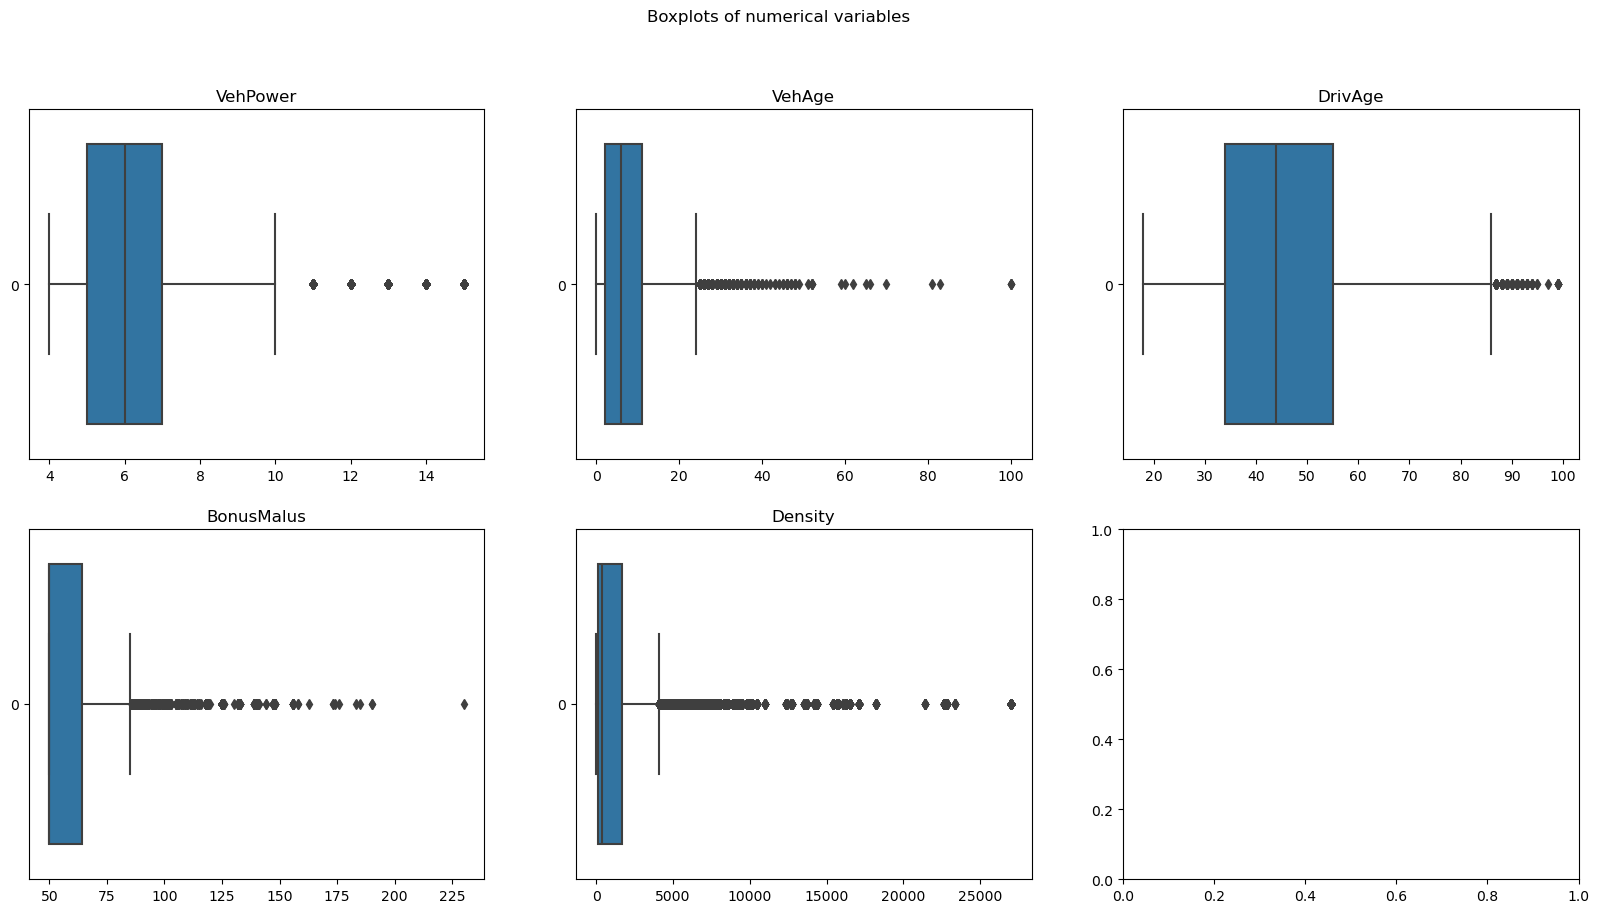

In [500]:
plot_boxplots(data, num_vars, 'Boxplots of numerical variables', 2, 3)

In [501]:
# # Clip outliers
# def IQR_rule(data, threshold=1.5):
#     Q1 = data.quantile(0.25)
#     Q3 = data.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - threshold * IQR
#     upper_bound = Q3 + threshold * IQR
#     return lower_bound, upper_bound

# # Clip outliers
# data[num_vars] = data[num_vars].apply(lambda x: x.clip(*IQR_rule(x), axis=0))

# outliers = data[num_vars].apply(lambda x: (x < IQR_rule(x)[0]) | (x > IQR_rule(x)[1])).any(axis=1)
# data = data[~outliers]
# print(f"Removed {outliers.sum()} outliers")

In [502]:
#plot_boxplots(data, num_vars, 'Boxplots of numerical variables', 2, 3)

In [503]:
f"{data[data['ClaimAmount'] > 0].shape[0] / data.shape[0] * 100:.2f} % of policies have at least 1 claim"


'3.70 % of policies have at least 1 claim'

<Axes: xlabel='DrivAge'>

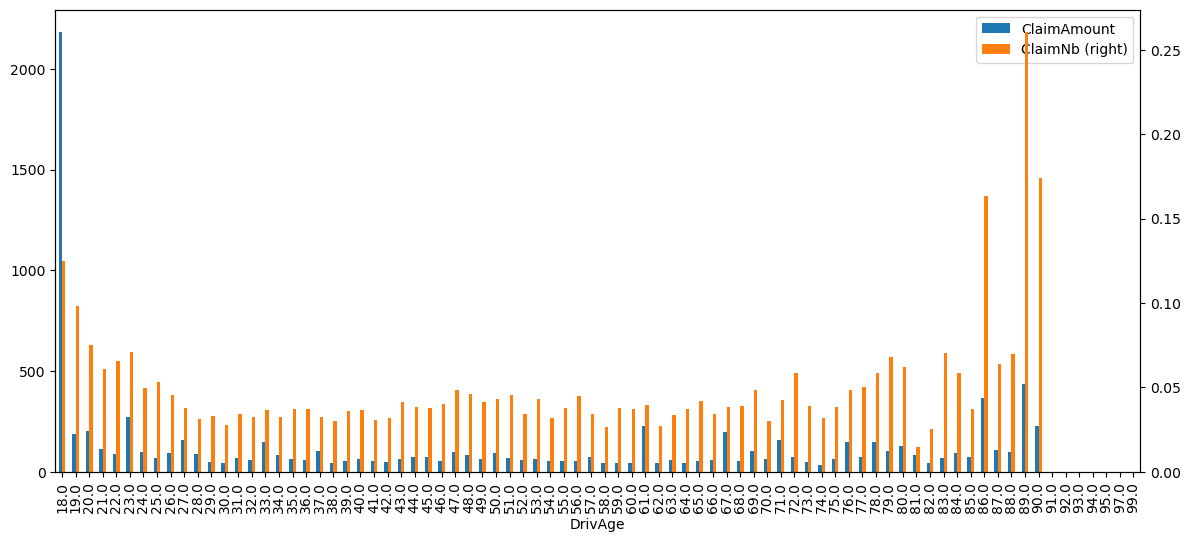

In [504]:
data.groupby('DrivAge').agg({'ClaimAmount': 'mean',
                             'ClaimNb': 'mean'},).plot(kind='bar', figsize=(14, 6),
                                                       secondary_y='ClaimNb')

<Axes: xlabel='VehAge'>

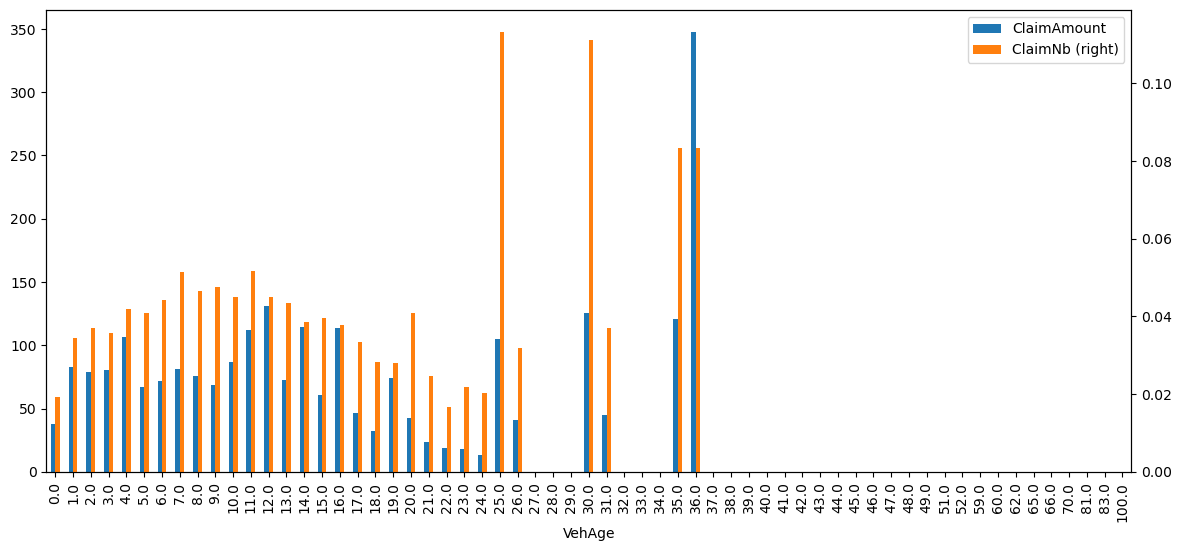

In [505]:
data.groupby('VehAge').agg({'ClaimAmount': 'mean',
                             'ClaimNb': 'mean'},).plot(kind='bar', figsize=(14, 6),
                                                       secondary_y='ClaimNb')

<Axes: xlabel='VehPower'>

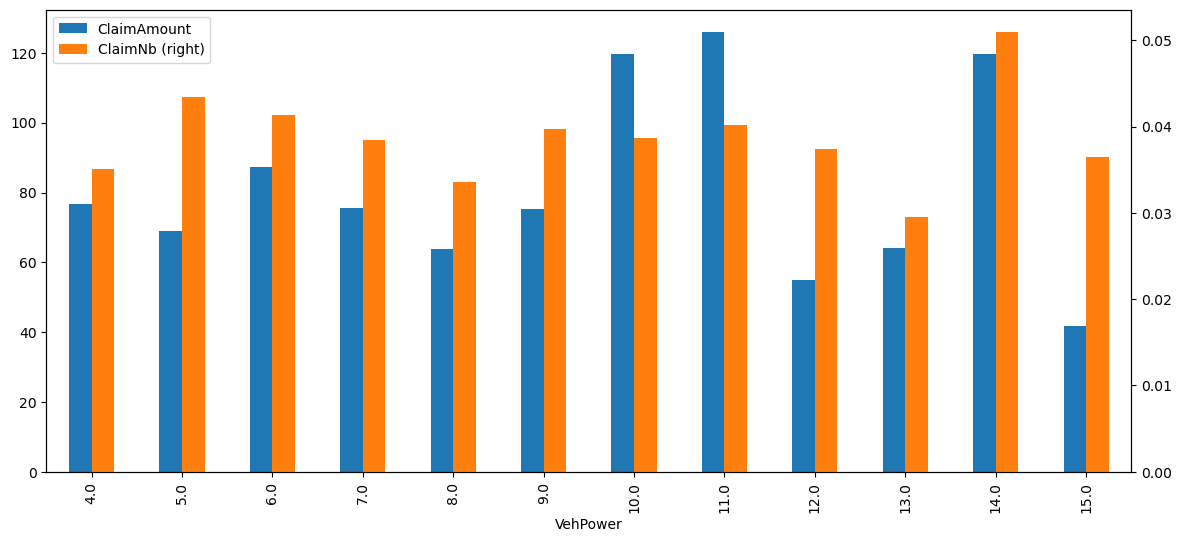

In [506]:
data.groupby('VehPower').agg({'ClaimAmount': 'mean',
                             'ClaimNb': 'mean'},).plot(kind='bar', figsize=(14, 6),
                                                       secondary_y='ClaimNb')

<Axes: xlabel='VehBrand'>

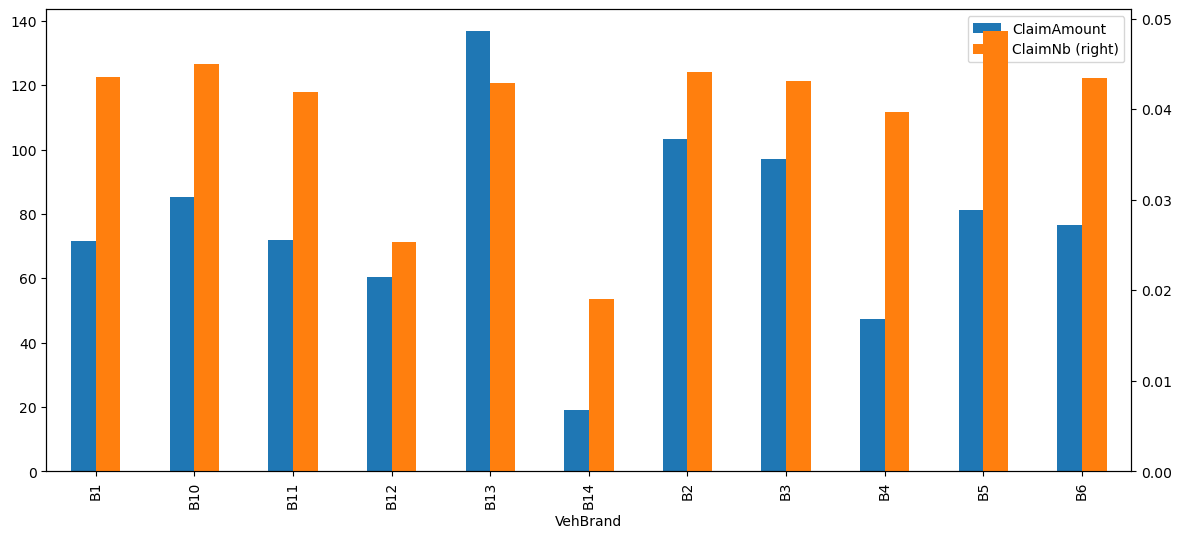

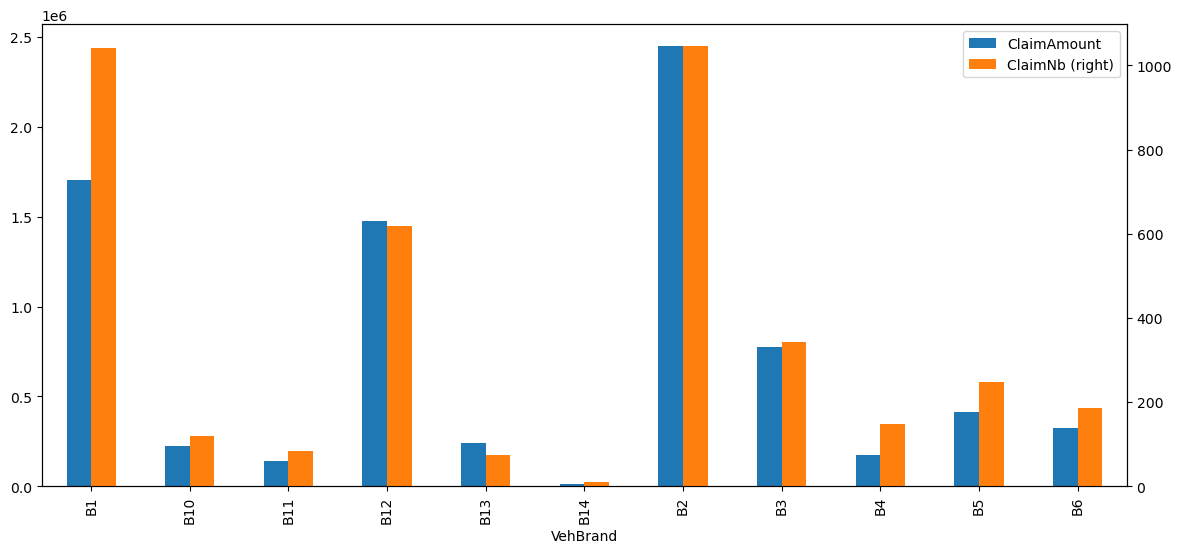

In [507]:
data.groupby('VehBrand').agg({'ClaimAmount': 'mean',
                             'ClaimNb': 'mean'},).plot(kind='bar', figsize=(14, 6),
                                                       secondary_y='ClaimNb')

data.groupby('VehBrand').agg({'ClaimAmount': 'sum',
                             'ClaimNb': 'sum'},).plot(kind='bar', figsize=(14, 6),
                                                       secondary_y='ClaimNb')

<Axes: xlabel='Region'>

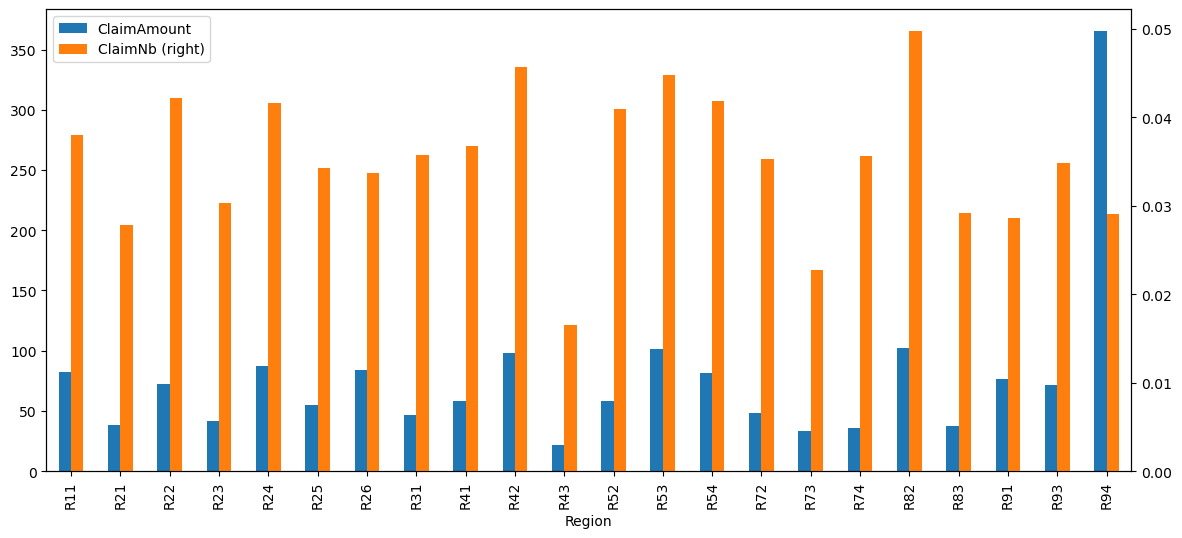

In [508]:
data.groupby('Region').agg({'ClaimAmount': 'mean',
                             'ClaimNb': 'mean'},).plot(kind='bar', figsize=(14, 6),
                                                       secondary_y='ClaimNb')

<Axes: xlabel='Area'>

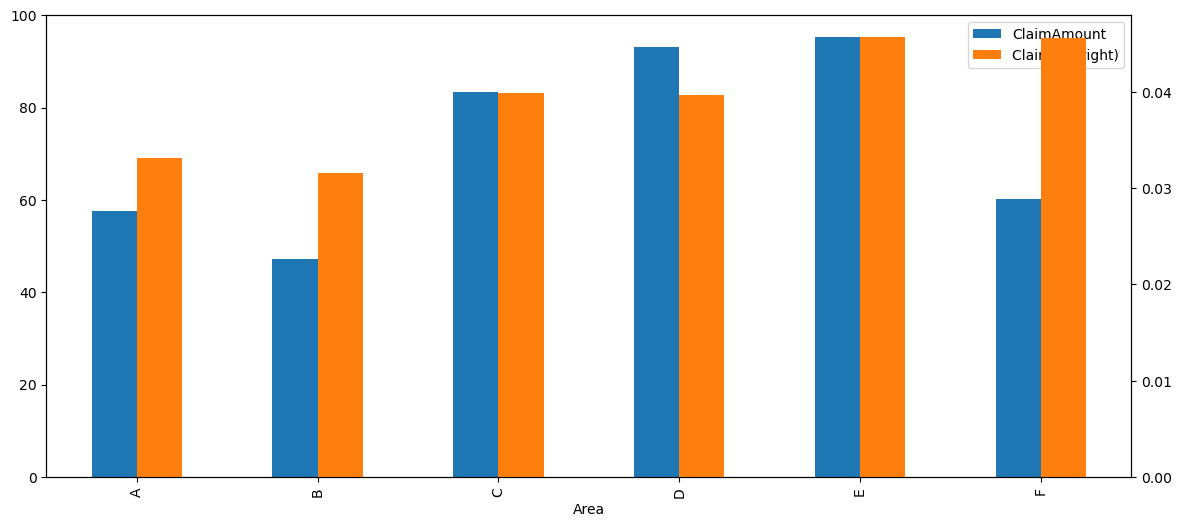

In [509]:
data.groupby('Area').agg({'ClaimAmount': 'mean',
                             'ClaimNb': 'mean'},).plot(kind='bar', figsize=(14, 6),
                                                       secondary_y='ClaimNb')

<Axes: xlabel='VehGas'>

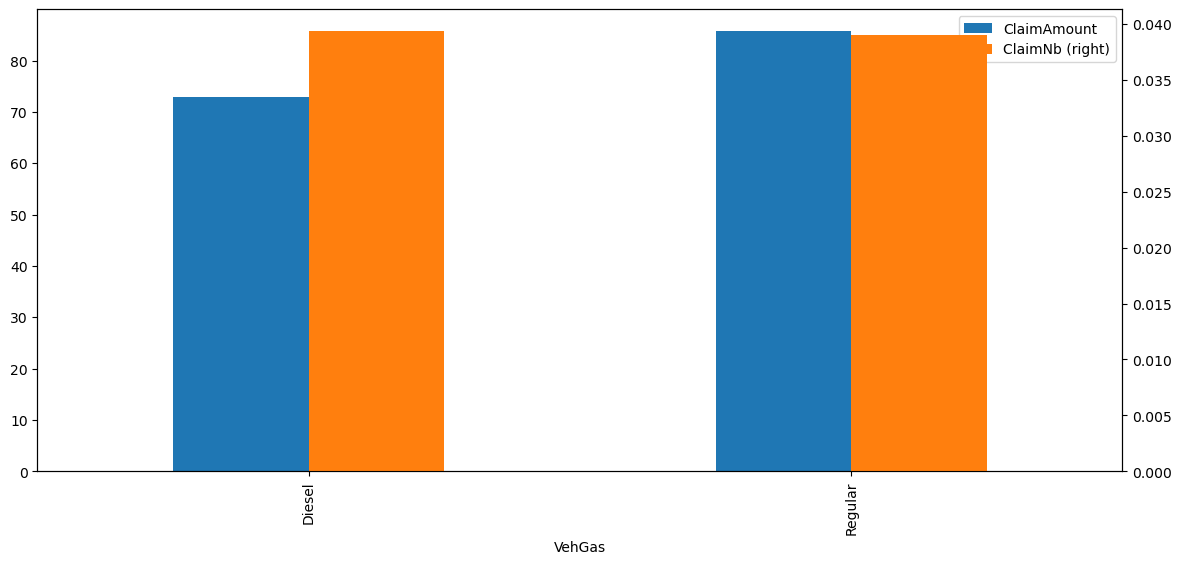

In [510]:
data.groupby('VehGas').agg({'ClaimAmount': 'mean',
                             'ClaimNb': 'mean'},).plot(kind='bar', figsize=(14, 6),
                                                       secondary_y='ClaimNb')

<Axes: xlabel='BonusMalus'>

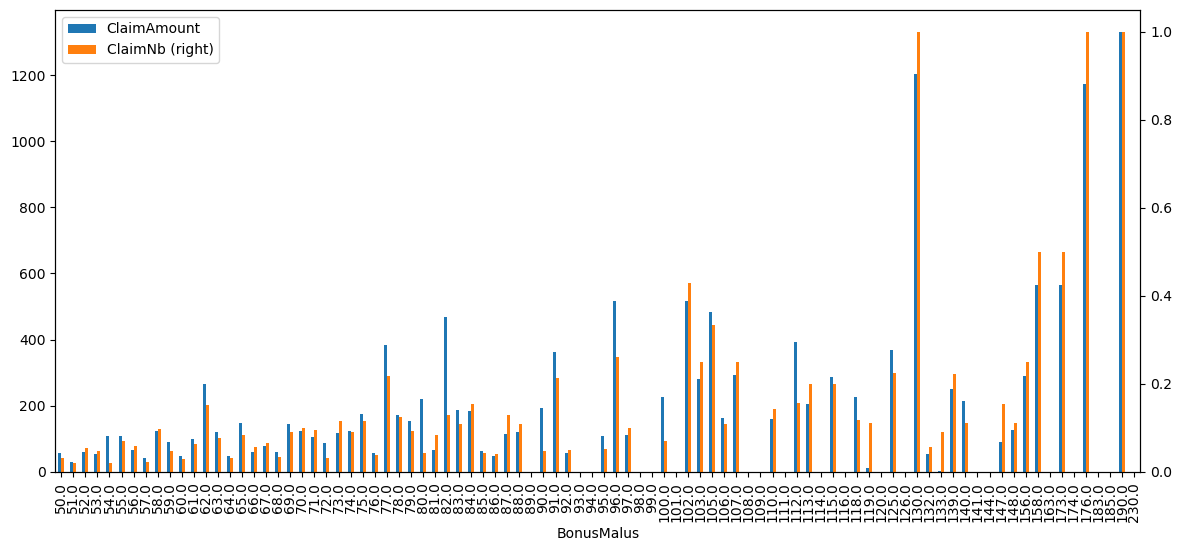

In [511]:
data.groupby('BonusMalus').agg({'ClaimAmount': 'mean',
                             'ClaimNb': 'mean'},).plot(kind='bar', figsize=(14, 6),
                                                       secondary_y='ClaimNb')

In [512]:
data['Adj premium'] = ((data['ClaimAmount'] / data['ClaimNb']) / data['Exposure']).fillna(0)

In [513]:
data['AgeBucket'] = pd.cut(data['DrivAge'], bins=[18, 25, 45, 65, 85, 100], right=False)

C:\Users\louis\AppData\Local\Temp\ipykernel_19216\3785224325.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('AgeBucket').agg({'Adj premium': 'mean'}).plot(kind='bar', figsize=(14, 6))


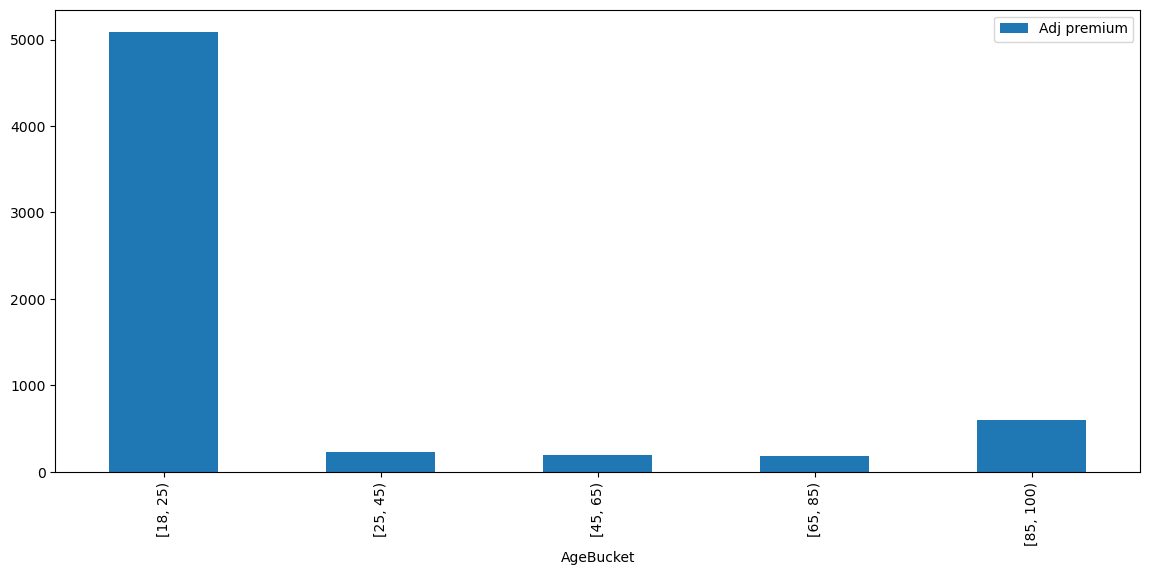

C:\Users\louis\AppData\Local\Temp\ipykernel_19216\3785224325.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('AgeBucket').agg({'Adj premium': 'sum'}).plot(kind='bar', figsize=(14, 6))


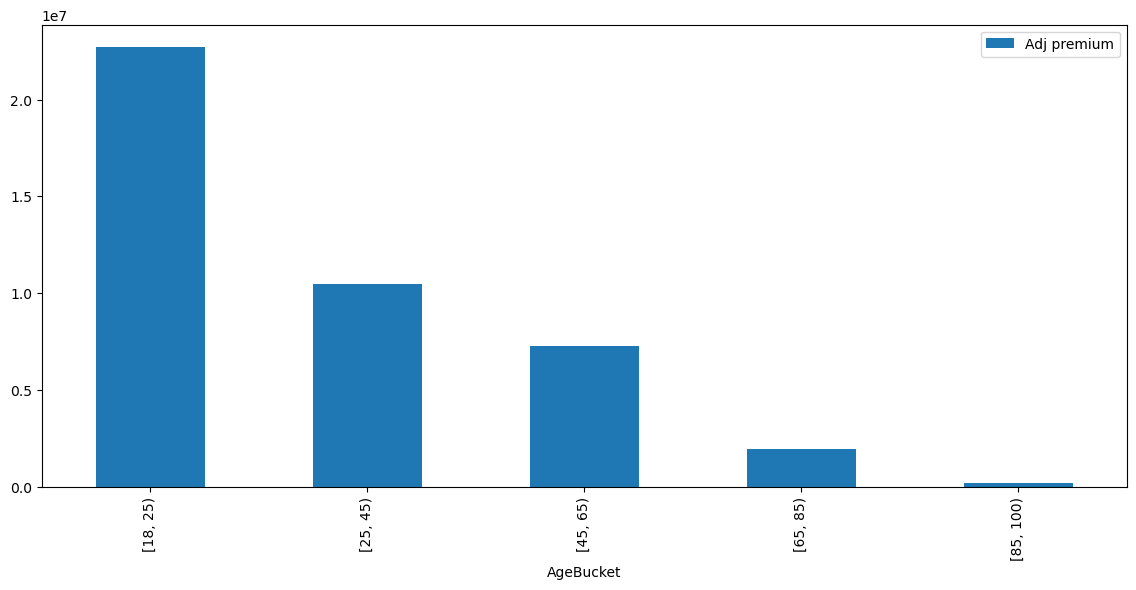

In [514]:
data.groupby('AgeBucket').agg({'Adj premium': 'mean'}).plot(kind='bar', figsize=(14, 6))
plt.show()

data.groupby('AgeBucket').agg({'Adj premium': 'sum'}).plot(kind='bar', figsize=(14, 6))
plt.show()

C:\Users\louis\AppData\Local\Temp\ipykernel_19216\1738791461.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('AgeBucket').agg({'ClaimAmount': 'mean'}).plot(kind='bar', figsize=(14, 6))


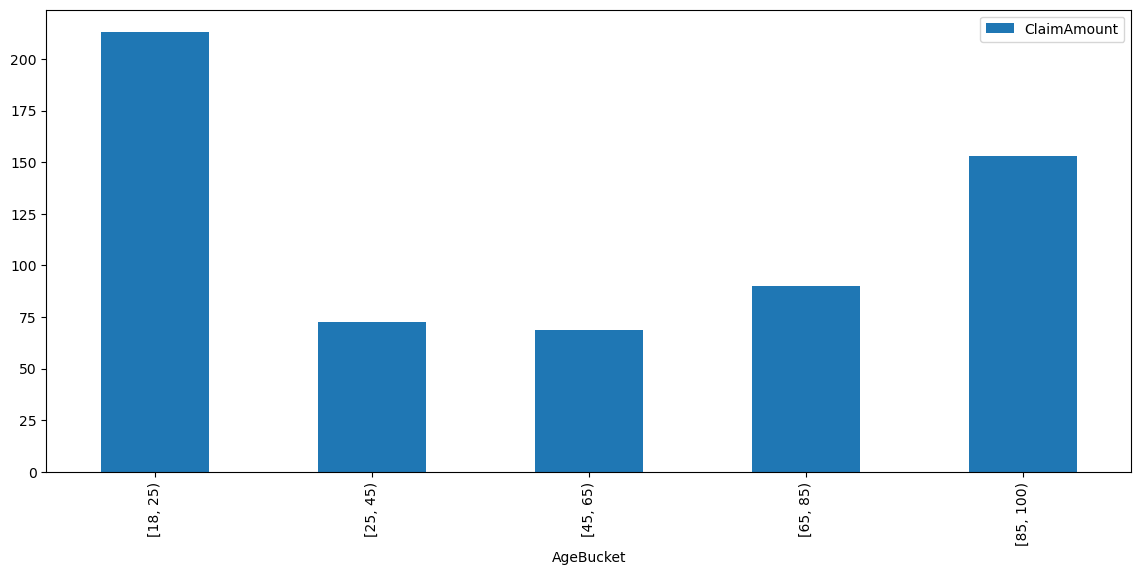

C:\Users\louis\AppData\Local\Temp\ipykernel_19216\1738791461.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('AgeBucket').agg({'ClaimAmount': 'sum'}).plot(kind='bar', figsize=(14, 6))


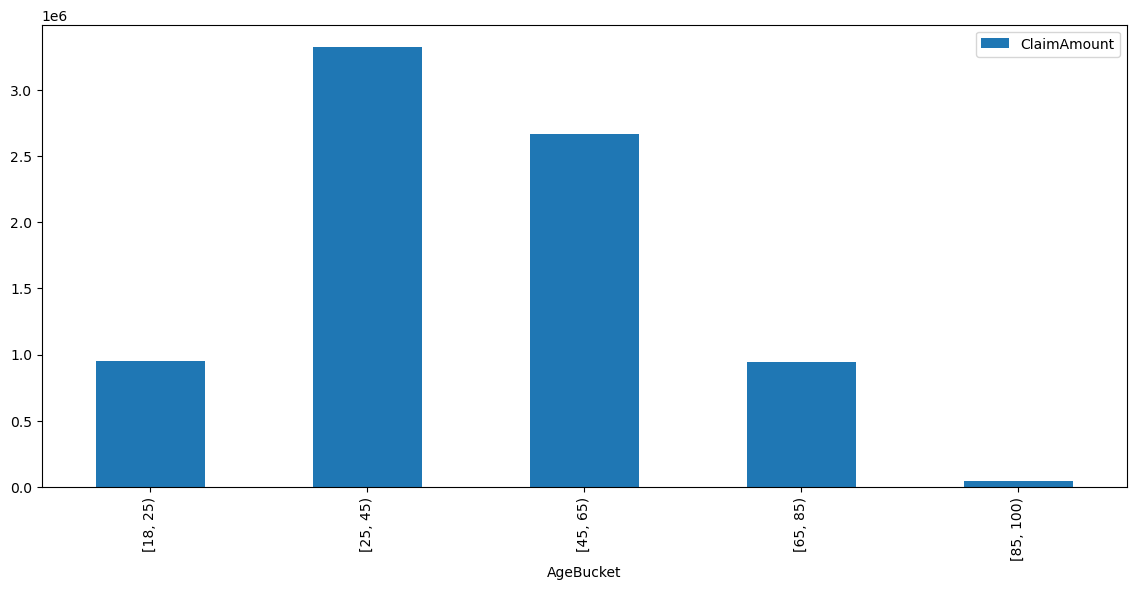

In [515]:
data.groupby('AgeBucket').agg({'ClaimAmount': 'mean'}).plot(kind='bar', figsize=(14, 6))
plt.show()

data.groupby('AgeBucket').agg({'ClaimAmount': 'sum'}).plot(kind='bar', figsize=(14, 6))
plt.show()

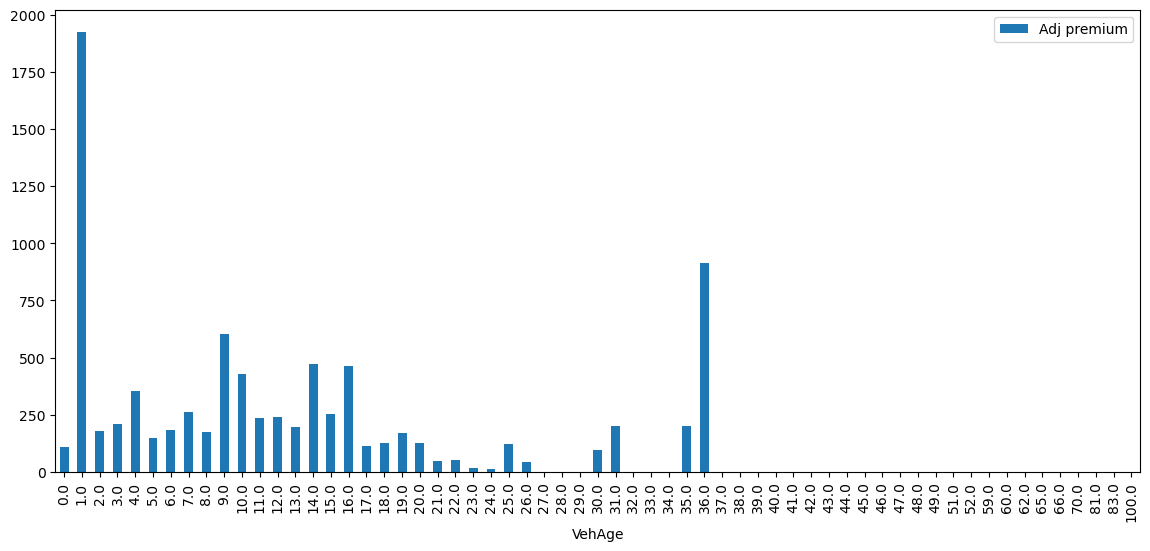

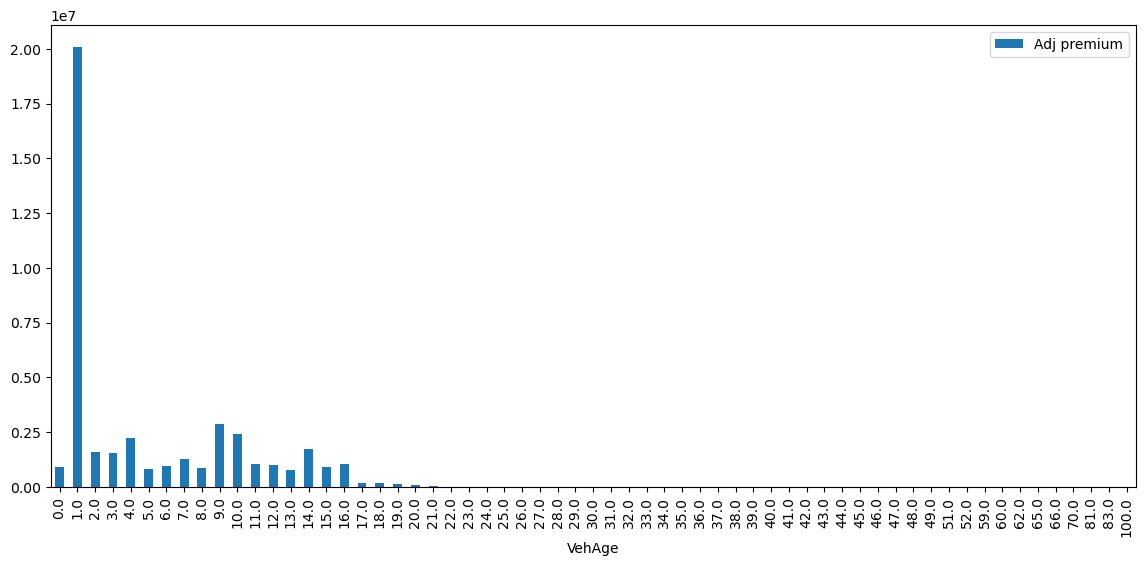

In [516]:
data.groupby('VehAge').agg({'Adj premium': 'mean'}).plot(kind='bar', figsize=(14, 6))
plt.show()

data.groupby('VehAge').agg({'Adj premium': 'sum'}).plot(kind='bar', figsize=(14, 6))
plt.show()

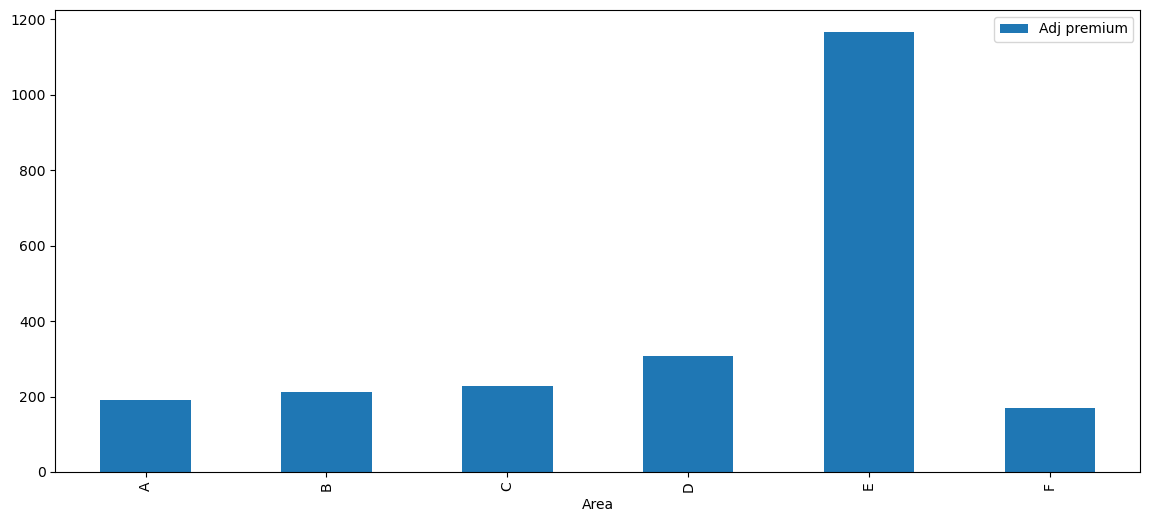

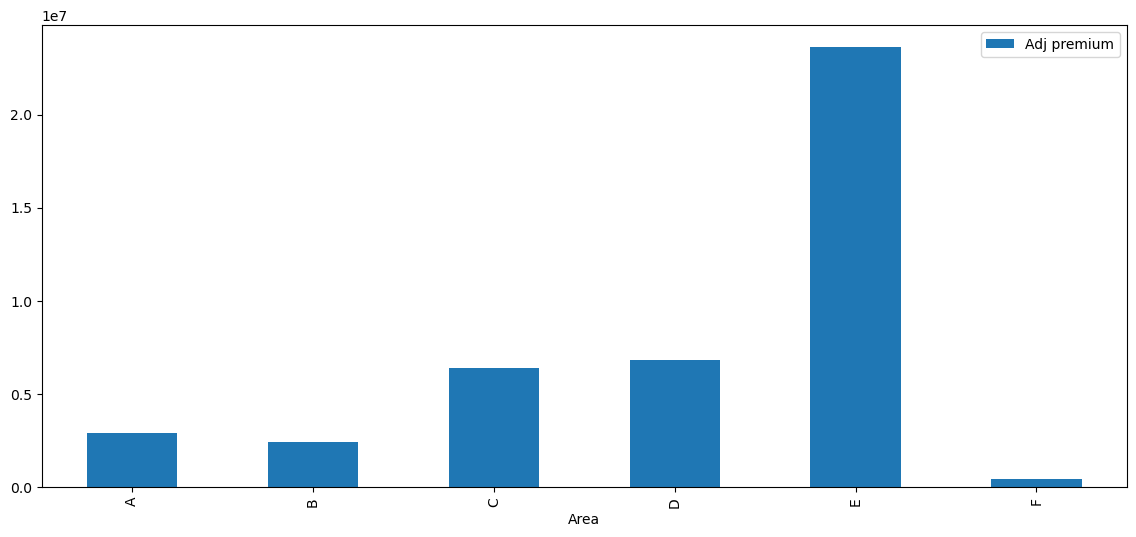

In [517]:
data.groupby('Area').agg({'Adj premium': 'mean'}).plot(kind='bar', figsize=(14, 6))
plt.show()

data.groupby('Area').agg({'Adj premium': 'sum'}).plot(kind='bar', figsize=(14, 6))
plt.show()

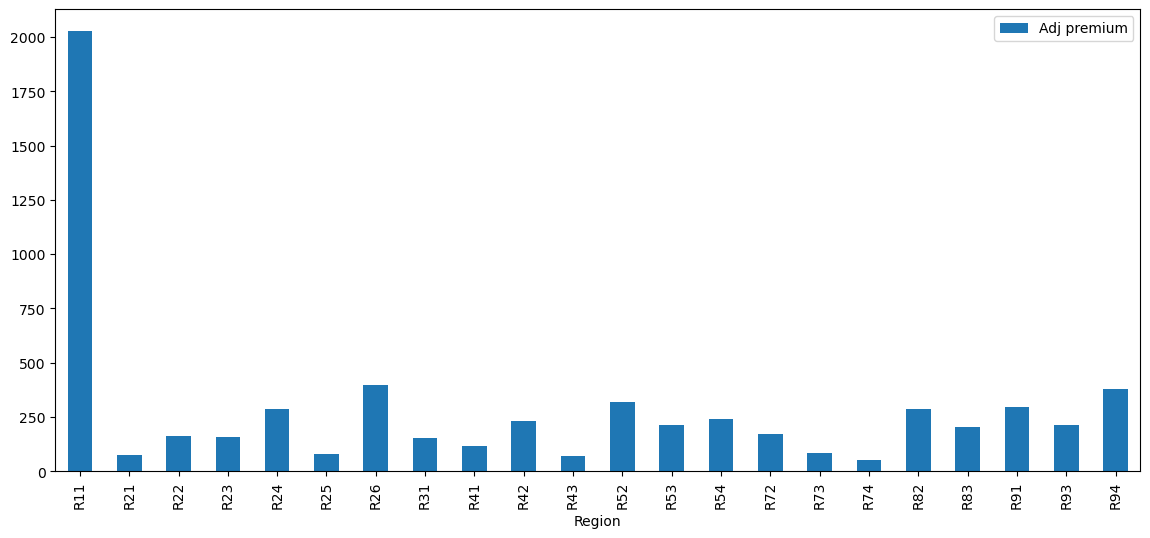

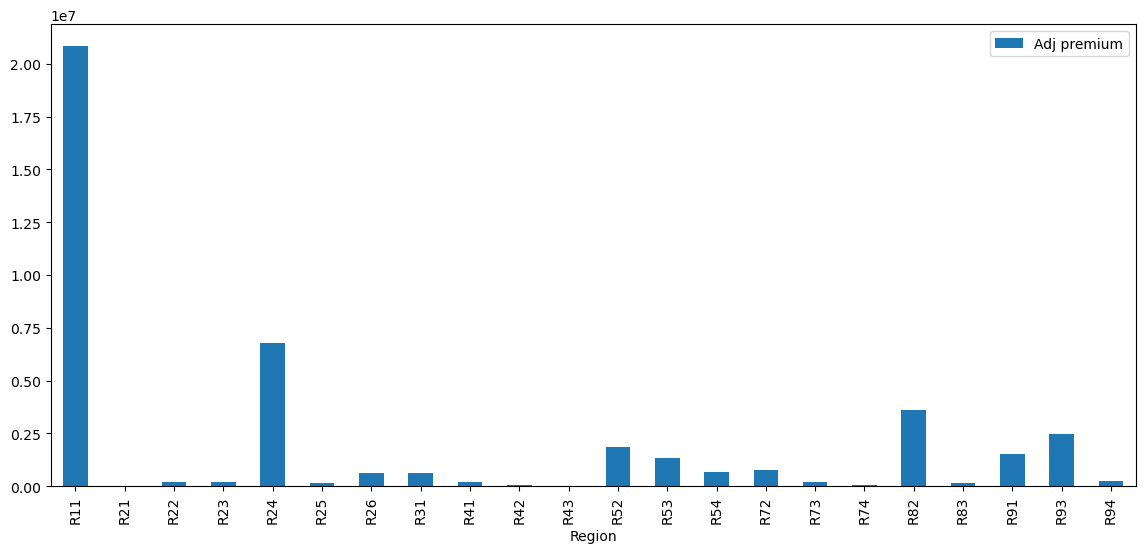

In [518]:
data.groupby('Region').agg({'Adj premium': 'mean'}).plot(kind='bar', figsize=(14, 6))
plt.show()

data.groupby('Region').agg({'Adj premium': 'sum'}).plot(kind='bar', figsize=(14, 6))
plt.show()

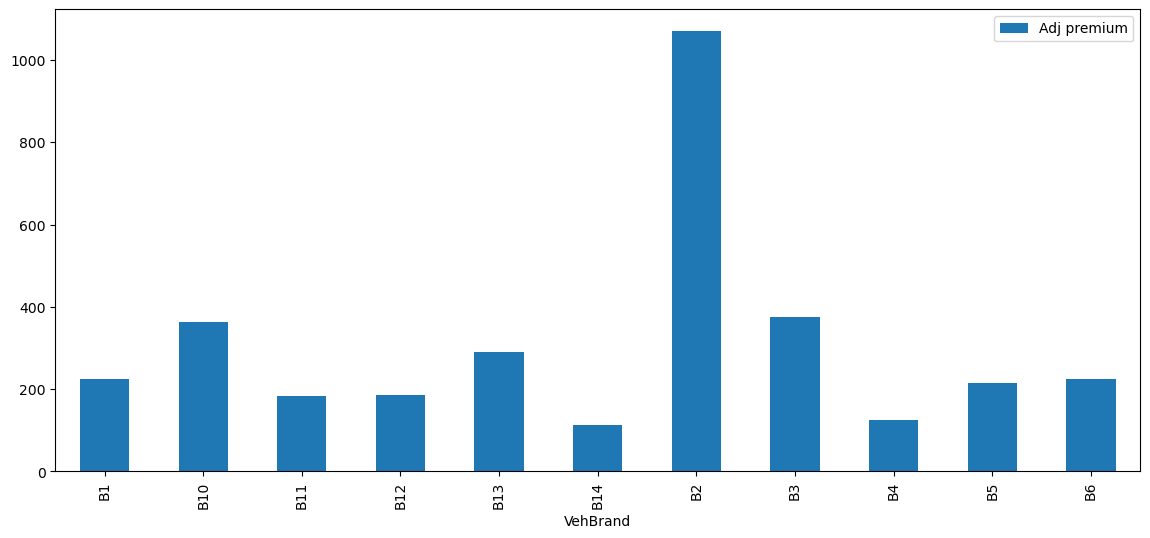

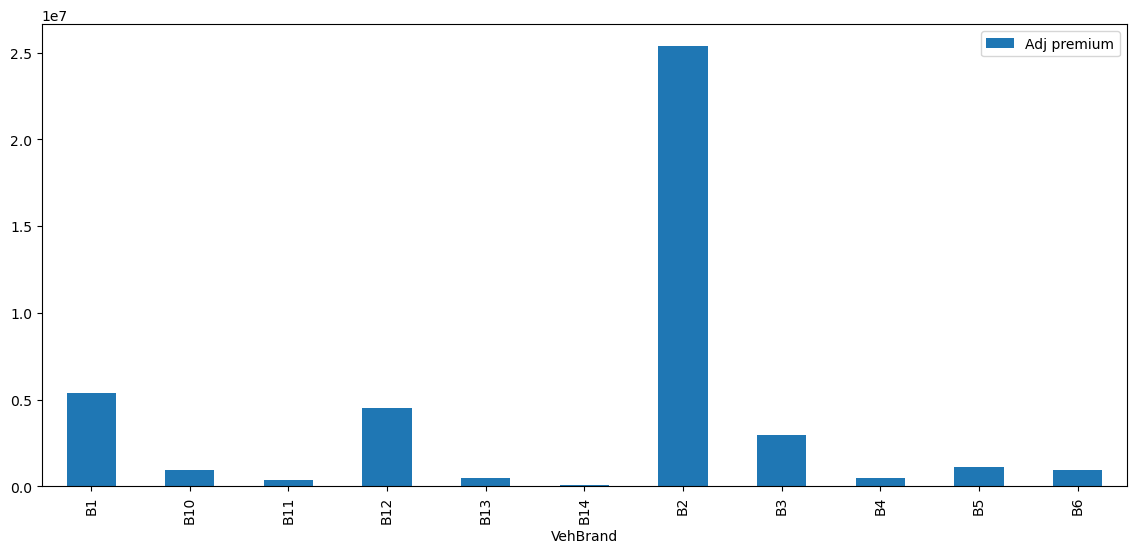

In [519]:
data.groupby('VehBrand').agg({'Adj premium': 'mean'}).plot(kind='bar', figsize=(14, 6))
plt.show()

data.groupby('VehBrand').agg({'Adj premium': 'sum'}).plot(kind='bar', figsize=(14, 6))
plt.show()

In [520]:
data['BonusMalusBucket'] = pd.cut(data['BonusMalus'], bins=[50, 75, 100, 125, 150, 250], right=False)

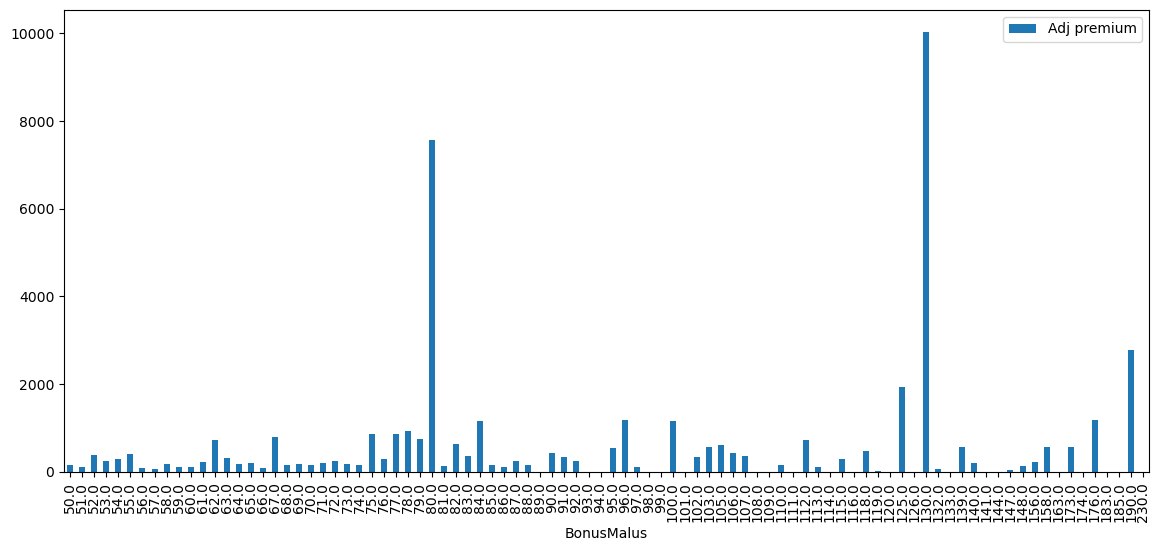

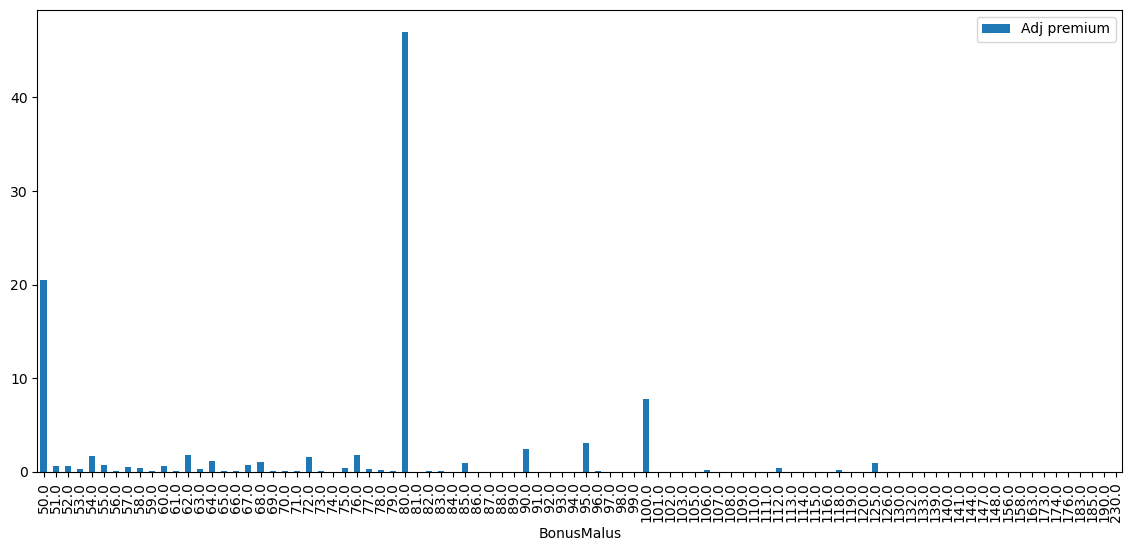

In [521]:
data.groupby('BonusMalus').agg({'Adj premium': 'mean'}).plot(kind='bar', figsize=(14, 6))
plt.show()

(data.groupby('BonusMalus').agg({'Adj premium': 'sum'}) / data['Adj premium'].sum() * 100).plot(kind='bar', figsize=(14, 6))
plt.show()

In [522]:
data[data['BonusMalus'] == 50][['Adj premium', 'ClaimAmount', 'ClaimNb', 'Exposure']].sort_values('Adj premium', ascending=False).dropna()

,Adj premium,ClaimAmount,ClaimNb,Exposure
31540,806014.900000,4416.52,1.0,0.005479
95740,332187.625000,26575.01,1.0,0.080000
7765,219532.142857,61469.00,1.0,0.280000
36193,201911.000000,2019.11,1.0,0.010000
67002,187611.129032,116318.90,1.0,0.620000
...,...,...,...,...
33969,0.000000,0.00,0.0,0.430000
33972,0.000000,0.00,0.0,0.050000
33973,0.000000,0.00,0.0,1.000000
33974,0.000000,0.00,0.0,1.000000


C:\Users\louis\AppData\Local\Temp\ipykernel_19216\503371352.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('BonusMalusBucket').agg({'Adj premium': 'mean'}).plot(kind='bar', figsize=(14, 6))


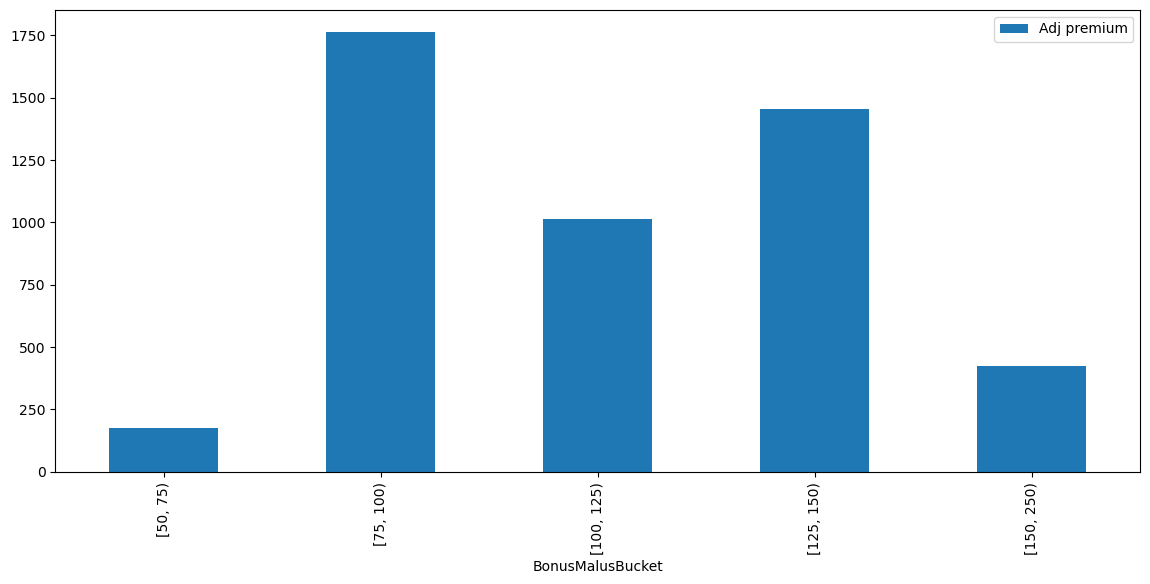

C:\Users\louis\AppData\Local\Temp\ipykernel_19216\503371352.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (data.groupby('BonusMalusBucket').agg({'Adj premium': 'sum'}) / data['Adj premium'].sum() * 100).plot(kind='bar', figsize=(14, 6))


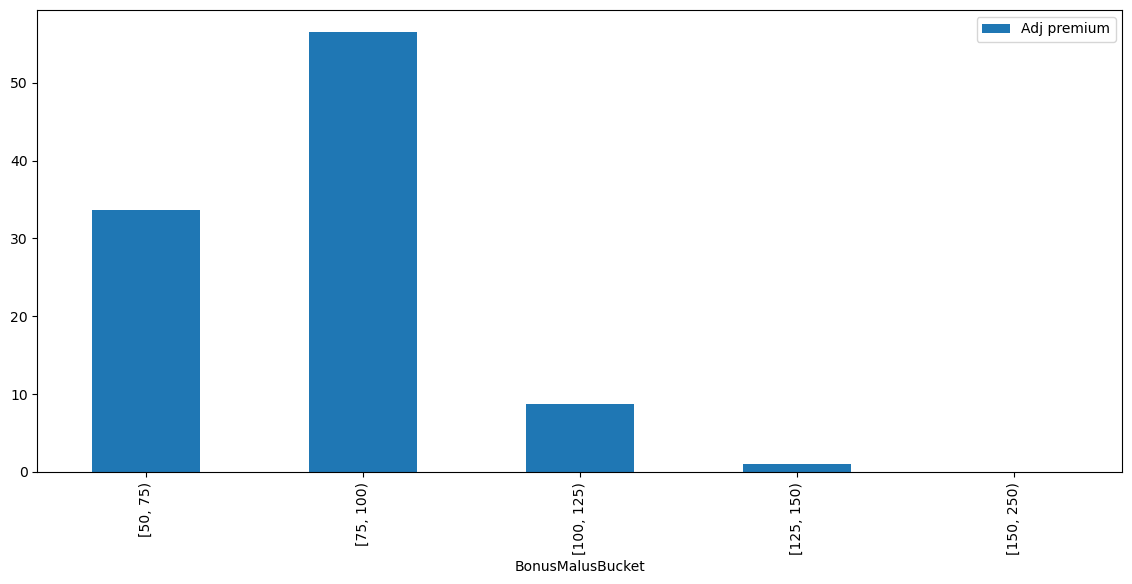

In [523]:
data.groupby('BonusMalusBucket').agg({'Adj premium': 'mean'}).plot(kind='bar', figsize=(14, 6))
plt.show()

(data.groupby('BonusMalusBucket').agg({'Adj premium': 'sum'}) / data['Adj premium'].sum() * 100).plot(kind='bar', figsize=(14, 6))
plt.show()

In [524]:
#data.drop(columns=['AgeBucket', 'BonusMalusBucket'], inplace=True)
data.drop(columns=['DrivAge', 'BonusMalusBucket'], inplace=True)

In [525]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import brier_score_loss, recall_score, f1_score

In [526]:
scaler = StandardScaler()

In [527]:
data['HasClaimed'] = data['ClaimAmount'].apply(lambda x: 1 if x > 0 else 0)
y = data['HasClaimed']

X = data.copy()
num_vars = [x for x in num_vars if x not in ['DrivAge']]

X[num_vars] = scaler.fit_transform(X[num_vars])

X.drop(columns=['IDpol', 'ClaimAmount', 'ClaimNb', 'HasClaimed', 'Exposure', 'Adj premium'], inplace=True)

X = pd.get_dummies(X, drop_first=False)

X.columns = [x.replace('[', '').replace(']', '').replace('(', '').replace(')', '').replace(',', '').replace(' ', '_') for x in X.columns]

X

,VehPower,VehAge,BonusMalus,Density,Area_A,Area_B,Area_C,Area_D,Area_E,Area_F,...,Region_R82,Region_R83,Region_R91,Region_R93,Region_R94,AgeBucket_18_25,AgeBucket_25_45,AgeBucket_45_65,AgeBucket_65_85,AgeBucket_85_100
0,-0.221387,-0.893493,0.146693,-0.376278,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,-0.709271,-0.716458,-0.623664,6.400416,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0.266497,-0.716458,-0.623664,-0.397603,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,-0.221387,-0.539423,0.596068,-0.395825,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,-1.197154,1.230929,-0.623664,-0.451422,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.197154,-1.070528,2.265175,-0.443298,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
99996,1.730148,-0.362387,-0.495271,0.649848,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
99997,-0.221387,-0.716458,-0.623664,0.042347,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
99998,-1.197154,-1.247563,0.403479,-0.214819,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False


In [528]:
#data.select_dtypes(exclude='object').corrwith(data['HasClaimed']).abs().sort_values(ascending=False)

<Axes: >

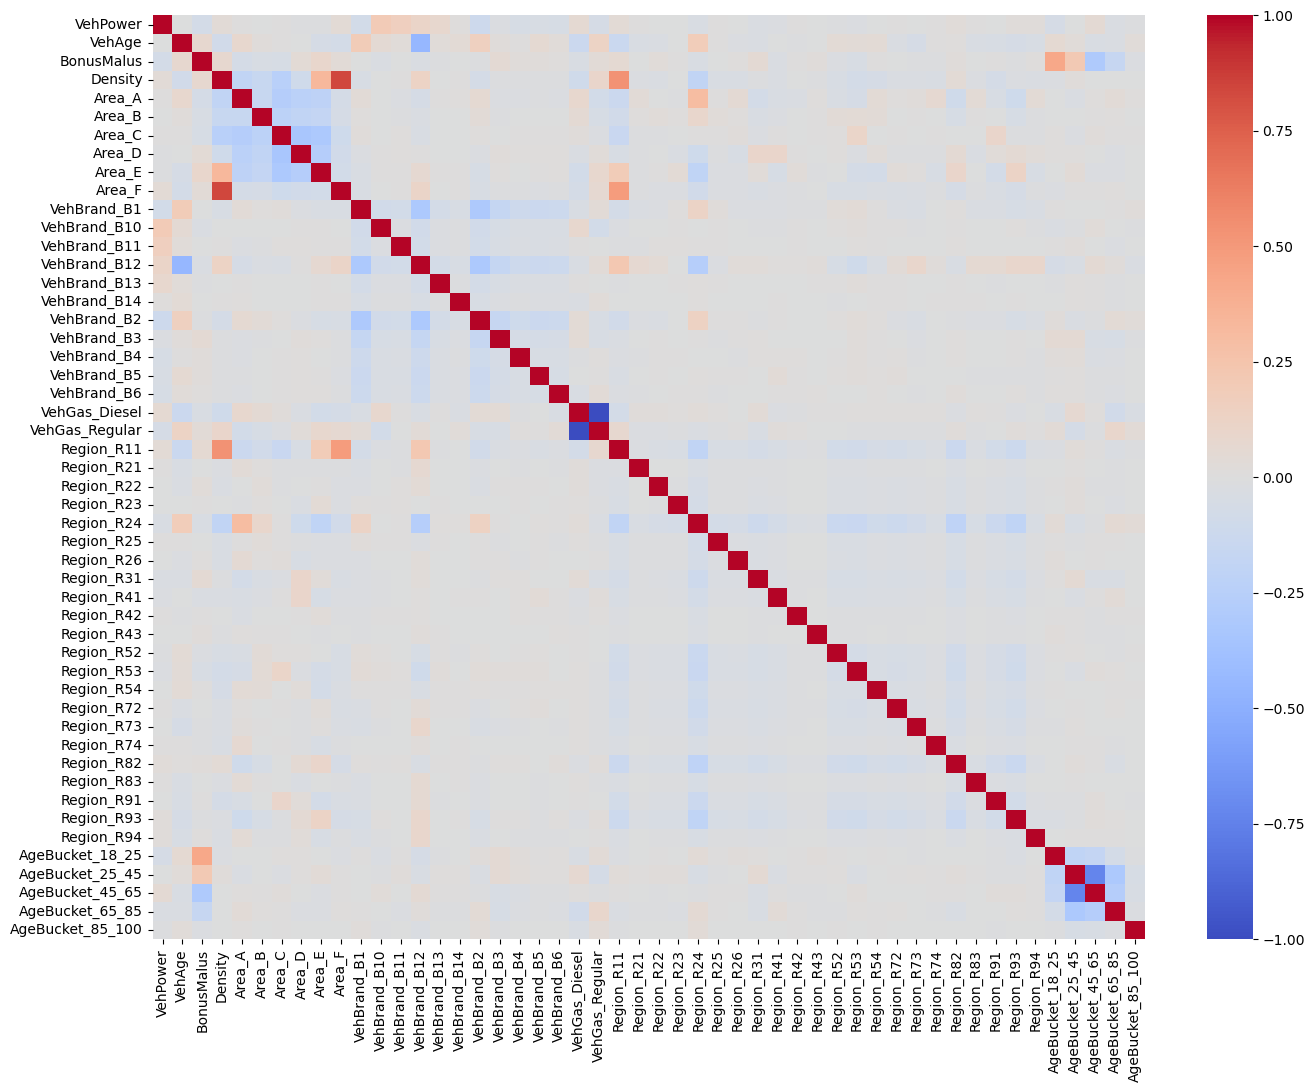

In [529]:
plt.figure(figsize=(16, 12))
sns.heatmap(X.corr(), cmap='coolwarm')

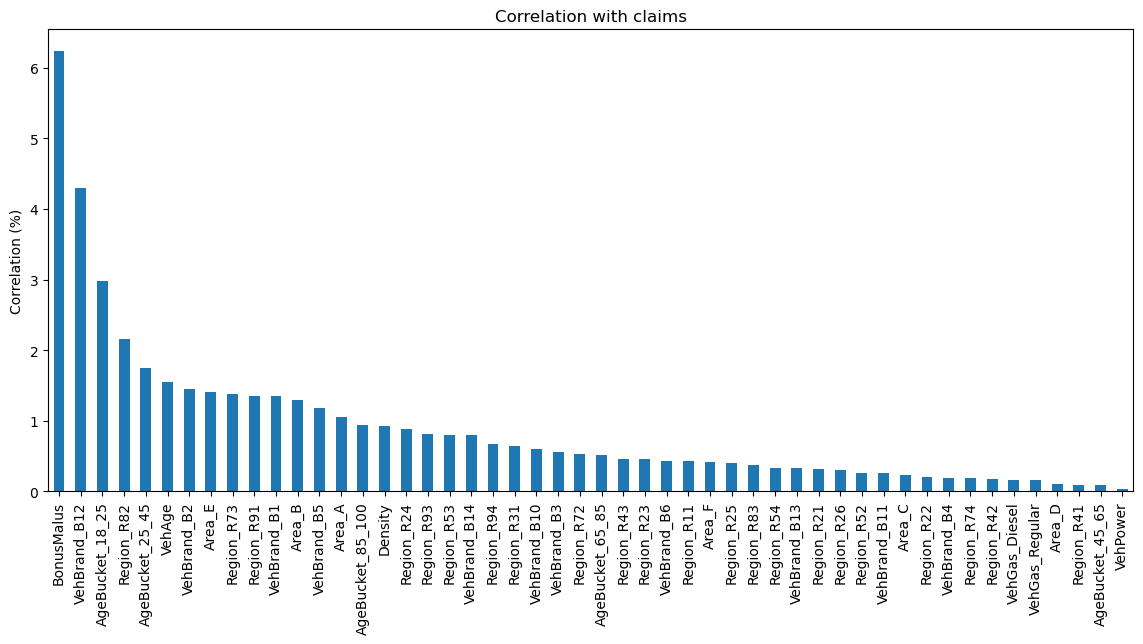

In [530]:
correlation_with_claims = X.corrwith(y).abs().sort_values(ascending=False) * 100

plt.figure(figsize=(14, 6))
correlation_with_claims.plot(kind='bar')
plt.title('Correlation with claims')
plt.ylabel('Correlation (%)')
plt.show()

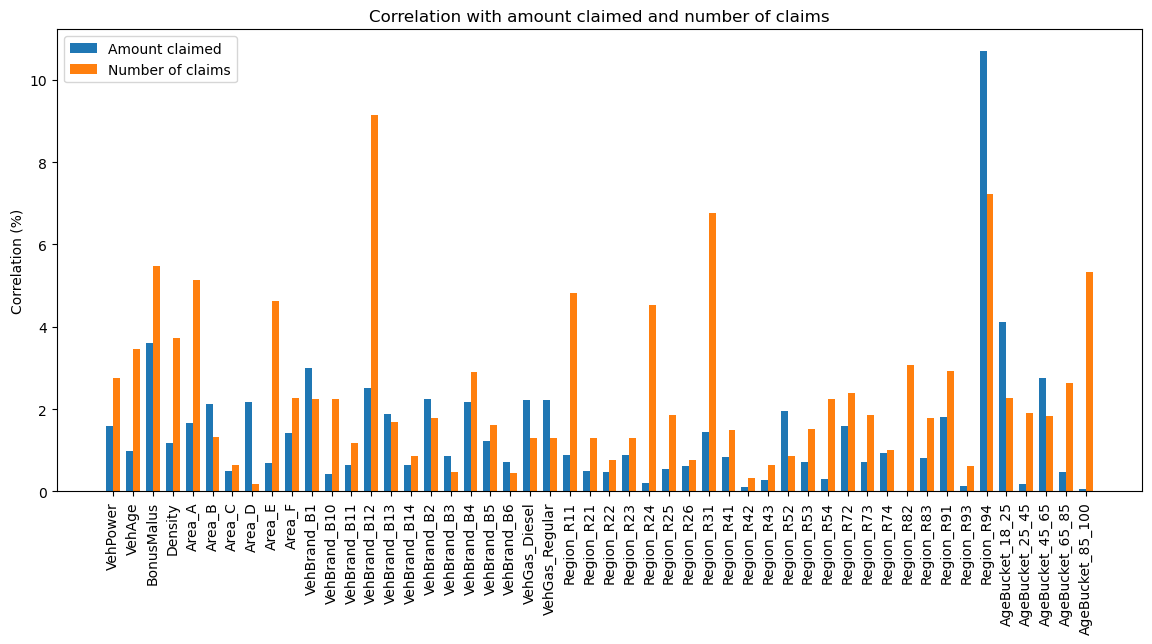

In [531]:
amounts = data[data['ClaimAmount'] > 0]['ClaimAmount']
numbers = data[data['ClaimNb'] > 0]['ClaimNb']
positive_claims = data[data['HasClaimed'] == 1] 
correlation_with_amount_claimed = X.corrwith(amounts).abs() * 100
correlation_with_number_of_claims = X.corrwith(numbers).abs() * 100

plt.figure(figsize=(14, 6))

width = 0.35
ind = np.arange(len(correlation_with_amount_claimed))
plt.bar(ind, correlation_with_amount_claimed, width, label='Amount claimed')
plt.bar(ind + width, correlation_with_number_of_claims, width, label='Number of claims')

plt.xticks(ind + width / 2, correlation_with_amount_claimed.index, rotation=90)
plt.legend()
plt.title('Correlation with amount claimed and number of claims')
plt.ylabel('Correlation (%)')
plt.show()

In [532]:
X.drop(columns=['VehGas_Diesel', 'VehGas_Regular'], inplace=True)

In [533]:
numeric_col = X.select_dtypes(exclude='object').columns
object_col = X.select_dtypes(include='object').columns

In [535]:
from sklearn.preprocessing import PolynomialFeatures
#X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X[num_vars])
#X = pd.concat([X, pd.DataFrame(X_poly)], axis=1)
#X.columns = [str(x) for x in X.columns
completed = []
for col in num_vars:
    X[f"{col}_squared"] = X[col] ** 2
    for col2 in num_vars:
        if col != col2 and f"{col2}_{col}" not in completed:
            col_name = f"{col}_{col2}"
            X[f"{col}_{col2}"] = X[col] * X[col2]
            completed.append(col_name)

In [536]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

In [537]:
cv = StratifiedKFold(n_splits=5, shuffle=False)
rf = RandomForestClassifier(n_estimators=100, random_state=26, oob_score=recall_score, class_weight='balanced')

In [538]:
params = {
    #"n_estimators": [100, 200],
    "max_depth": [3, 5, 10],
    #'random_state': [26],
    'min_samples_split': [2, 5, 10],
    #'max_features':[0.2, 0.5, 1],
    #'class_weight': ['balanced', None]
}

grid_rf = GridSearchCV(rf, param_grid=params, cv=cv, scoring='recall', n_jobs=-1)

In [539]:
fitted_grid = grid_rf.fit(X_train, y_train)

In [540]:
print(fitted_grid.best_params_)
print(fitted_grid.best_score_)

{'max_depth': 5, 'min_samples_split': 5}
0.5137533935447237


In [541]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [542]:
ROS = RandomOverSampler(random_state=26)
tomek = TomekLinks()

In [543]:
X_train_over_resampled, y_train_over_resampled = ROS.fit_resample(X_train, y_train)

In [544]:
print(f"Original class distribution: {y_train.value_counts()}")
print("--------------------------------------------------")
print(f"Resampled class distribution: {y_train_over_resampled.value_counts()}")

Original class distribution: HasClaimed
0    77092
1     2908
Name: count, dtype: int64
--------------------------------------------------
Resampled class distribution: HasClaimed
0    77092
1    77092
Name: count, dtype: int64


In [545]:
from imblearn.pipeline import Pipeline

In [546]:
random_over_sampling_pipeline = Pipeline([
    ('ROS', RandomOverSampler(random_state=26)),
    ('RF', RandomForestClassifier(n_estimators=100, random_state=26, oob_score=f1_score))
])

SMOTE_pipeline = Pipeline([
    ('SMOTE', SMOTE(random_state=26)),
    ('RF', RandomForestClassifier(n_estimators=100, random_state=26, oob_score=f1_score))
])

SMOTE_tomek_pipeline = Pipeline([
    ('SMOTE_tomek', SMOTETomek(random_state=26)),
    ('RF', RandomForestClassifier(n_estimators=100, random_state=26, oob_score=f1_score))
])

In [547]:
models = [x for x in model_folder.glob('*.pkl') if x.is_file()]

In [548]:
if model_folder / 'oversample_RF_best_model_recall_poly_features.pkl' in models:
    with open(model_folder / 'oversample_RF_best_model_recall_poly_features.pkl', 'rb') as f:
        best_over_sampling_model = pickle.load(f)
else:
    over_params = {
        f"RF__{key}": value for key, value in params.items()
    }

    grid_over_sampling = GridSearchCV(random_over_sampling_pipeline, param_grid=over_params, cv=cv, scoring='recall', n_jobs=-1)

    fitted_grid_over_sampling = grid_over_sampling.fit(X_train, y_train)

    print(fitted_grid_over_sampling.best_params_)
    print(fitted_grid_over_sampling.best_score_)

    best_over_sampling_model = fitted_grid_over_sampling.best_estimator_

    with open(model_folder / 'oversample_RF_best_model_recall_poly_features.pkl', 'wb') as file:
        pickle.dump(best_over_sampling_model, file)

y_pred = best_over_sampling_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

{'RF__max_depth': 5, 'RF__min_samples_split': 2}
0.5195911776709193
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     19204
           1       0.06      0.48      0.10       796

    accuracy                           0.66     20000
   macro avg       0.51      0.57      0.44     20000
weighted avg       0.93      0.66      0.76     20000

[[12769  6435]
 [  413   383]]


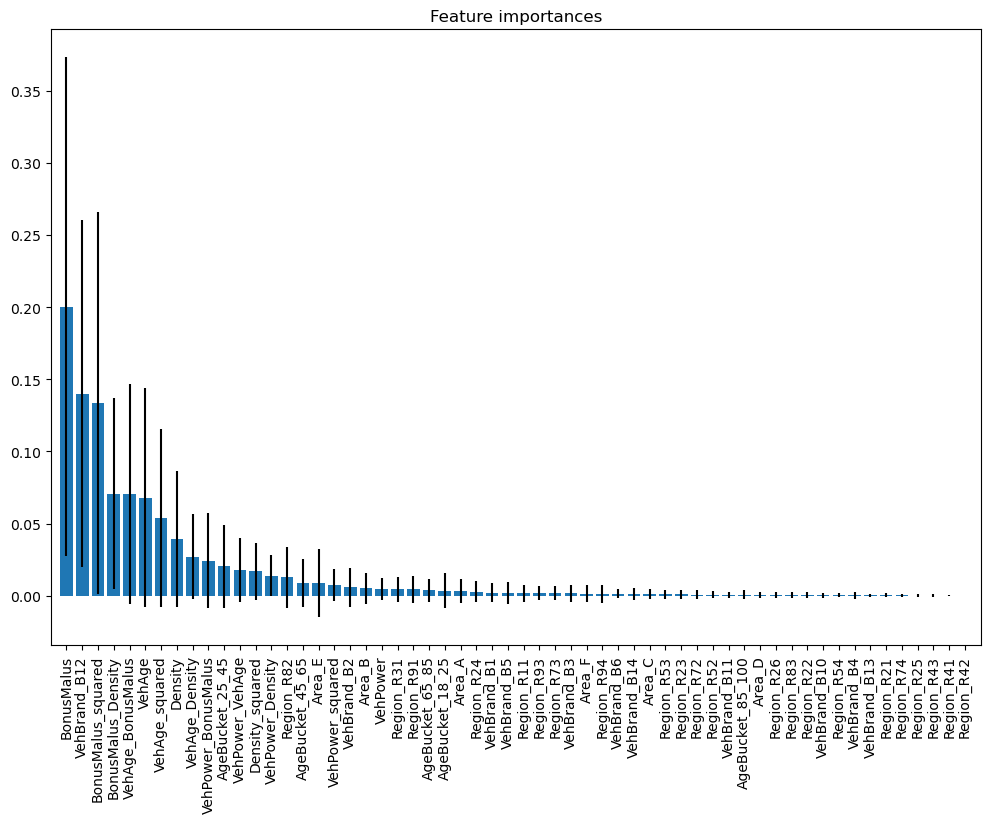

In [549]:
importances = best_over_sampling_model.steps[1][1].feature_importances_
std = np.std([tree.feature_importances_ for tree in best_over_sampling_model.steps[1][1].estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [550]:
if model_folder / 'SMOTE_RF_best_model_recall_poly_features.pkl' in models:
    with open(model_folder / 'SMOTE_RF_best_model_recall_poly_features.pkl', 'rb') as f:
        best_SMOTE_model = pickle.load(f)
else:
    over_params = {
        f"RF__{key}": value for key, value in params.items()
    }

    grid_SMOTE = GridSearchCV(SMOTE_pipeline, param_grid=over_params, cv=cv, scoring='recall', n_jobs=-1)

    fitted_grid_SMOTE = grid_SMOTE.fit(X_train, y_train)

    print(fitted_grid_SMOTE.best_params_)
    print(fitted_grid_SMOTE.best_score_)

    best_SMOTE_model = fitted_grid_SMOTE.best_estimator_

    with open(model_folder / 'SMOTE_RF_best_model_recall_poly_features.pkl', 'wb') as file:
        pickle.dump(best_SMOTE_model, file)

y_pred = best_SMOTE_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

{'RF__max_depth': 3, 'RF__min_samples_split': 2}
0.4717964642073449
              precision    recall  f1-score   support

           0       0.97      0.65      0.78     19204
           1       0.06      0.49      0.10       796

    accuracy                           0.65     20000
   macro avg       0.51      0.57      0.44     20000
weighted avg       0.93      0.65      0.75     20000

[[12573  6631]
 [  408   388]]


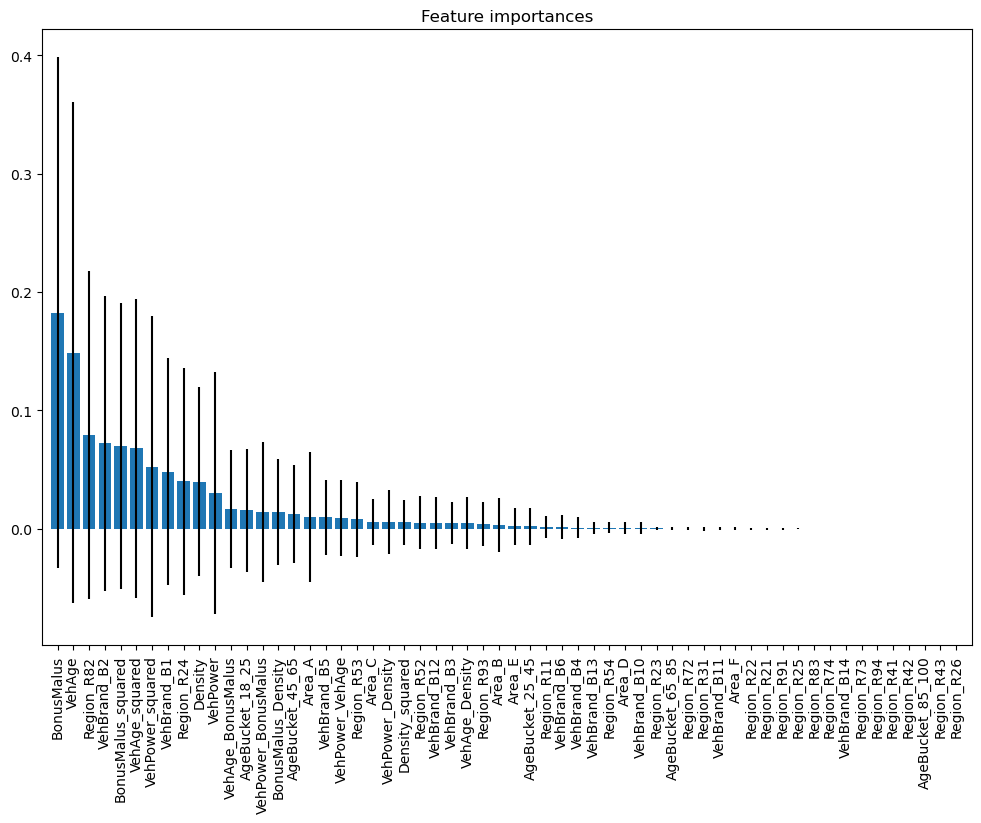

In [551]:
importances = best_SMOTE_model.steps[1][1].feature_importances_
std = np.std([tree.feature_importances_ for tree in best_SMOTE_model.steps[1][1].estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [552]:
if model_folder / 'SMOTE_tomek_RF_best_model_recall_poly_features.pkl' in models:
    with open(model_folder / 'SMOTE_RF_best_model_recall_poly_features.pkl', 'rb') as f:
        best_SMOTE_model = pickle.load(f)
else:
    over_params = {
        f"RF__{key}": value for key, value in params.items()
    }

    grid_SMOTE = GridSearchCV(SMOTE_pipeline, param_grid=over_params, cv=cv, scoring='recall', n_jobs=-1)

    fitted_grid_SMOTE = grid_SMOTE.fit(X_train, y_train)

    print(fitted_grid_SMOTE.best_params_)
    print(fitted_grid_SMOTE.best_score_)

    best_SMOTE_model = fitted_grid_SMOTE.best_estimator_

    with open(model_folder / 'SMOTE_RF_best_model_recall_poly_features.pkl', 'wb') as file:
        pickle.dump(best_SMOTE_model, file)

y_pred = best_SMOTE_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

{'RF__max_depth': 3, 'RF__min_samples_split': 2}
0.4717964642073449
              precision    recall  f1-score   support

           0       0.97      0.65      0.78     19204
           1       0.06      0.49      0.10       796

    accuracy                           0.65     20000
   macro avg       0.51      0.57      0.44     20000
weighted avg       0.93      0.65      0.75     20000

[[12573  6631]
 [  408   388]]


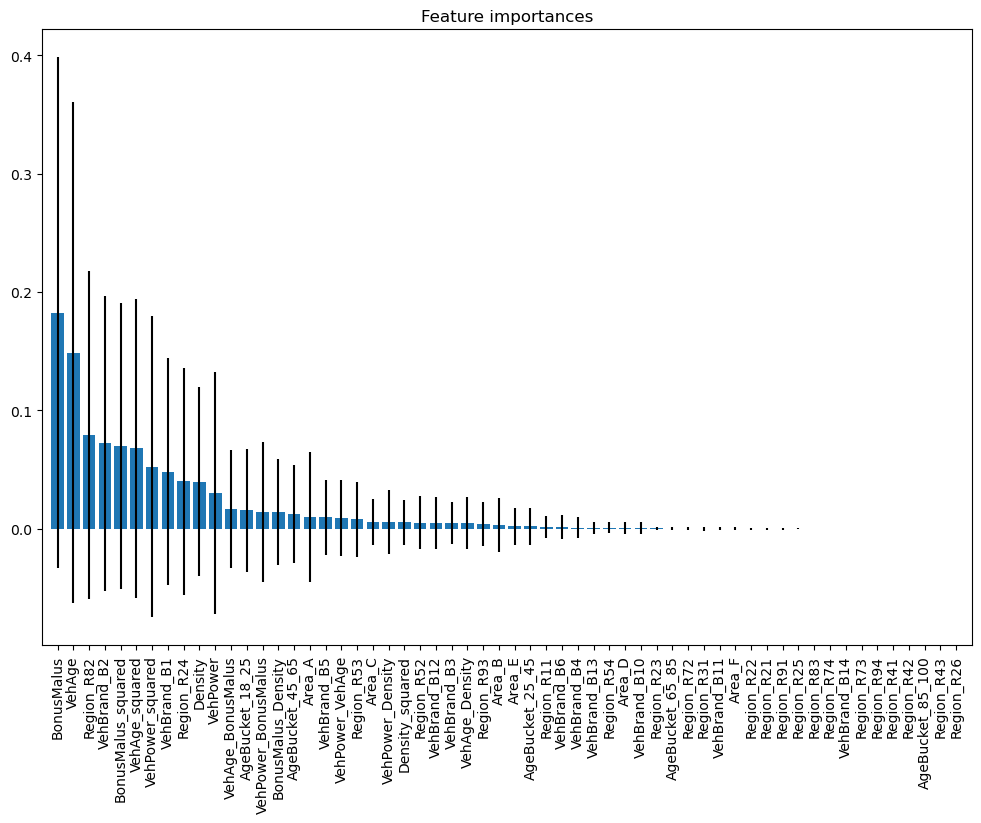

In [553]:
importances = best_SMOTE_model.steps[1][1].feature_importances_
std = np.std([tree.feature_importances_ for tree in best_SMOTE_model.steps[1][1].estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [554]:
y_pos = y_train[y_train == 1]
X_pos = X_train[y_train == 1]
n_y_pos = y_pos.shape[0]

X_no_pos = X_train[y_train == 0]
y_no_pos = y_train[y_train == 0]

Xs = [pd.concat([X_no_pos[i:i + n_y_pos], X_pos]) for i in range(0, X_no_pos.shape[0], n_y_pos)]
Ys = [pd.concat([y_no_pos[i:i + n_y_pos], y_pos]) for i in range(0, y_no_pos.shape[0], n_y_pos)]

In [555]:
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
#space['penalty'] = ['l2']#, 'l1', 'elasticnet']
space['C'] = np.logspace(0, 5, 10)
LR = LogisticRegression(penalty='l2', max_iter=1000)

models = []
for x, y in zip(Xs, Ys):
    model = GridSearchCV(LR, space, n_jobs=-1, scoring='recall', cv=5)
    model.fit(x, y)
    models.append(model)

In [556]:
predictions = [model.predict(X_test) for model in models]
average_preds = np.mean(predictions, axis=0) > 0.5
avg_betas = np.mean([model.best_estimator_.coef_ for model in models], axis=0)

confusion_matrix(y_test, average_preds)
print(classification_report(y_test, average_preds))

              precision    recall  f1-score   support

           0       0.97      0.58      0.73     19204
           1       0.06      0.60      0.10       796

    accuracy                           0.58     20000
   macro avg       0.51      0.59      0.41     20000
weighted avg       0.94      0.58      0.70     20000



In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(X.columns, avg_betas[0], align="center")
plt.xticks(X.columns, rotation=90)
plt.show()

In [557]:
space = dict()
space['C'] = np.logspace(-4, 4, 20)
LR = LogisticRegression(penalty='l1', solver='liblinear')

models = []
for x, y in zip(Xs, Ys):
    model = GridSearchCV(LR, space, n_jobs=-1, scoring='recall', cv=5)
    model.fit(x, y)
    models.append(model)

In [558]:
predictions = [model.predict(X_test) for model in models]
avg_betas = np.mean([model.best_estimator_.coef_ for model in models], axis=0)
average_preds = np.mean(predictions, axis=0) > 0.5

confusion_matrix(y_test, average_preds)
print(classification_report(y_test, average_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     19204
           1       0.04      1.00      0.08       796

    accuracy                           0.04     20000
   macro avg       0.02      0.50      0.04     20000
weighted avg       0.00      0.04      0.00     20000



c:\Users\louis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\louis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\louis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


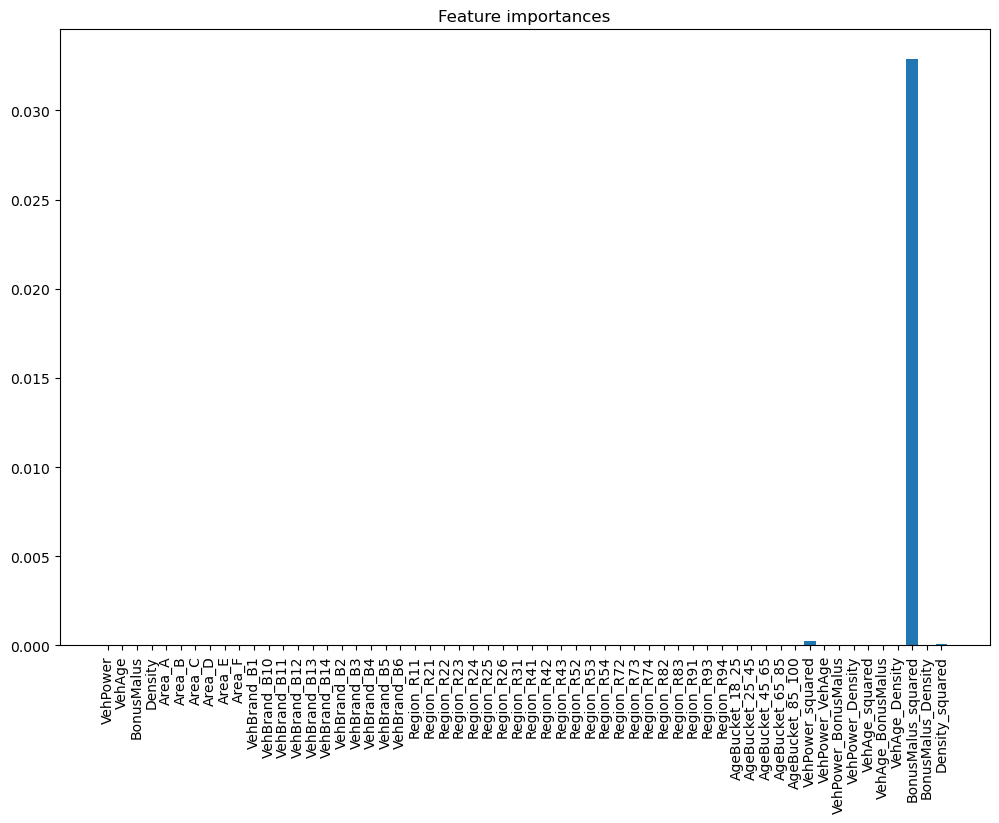

In [559]:
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(X.columns, avg_betas[0], align="center")
plt.xticks(X.columns, rotation=90)
plt.show()

In [560]:
cols = [col for col in X.columns if 'AgeBucket' in col]

In [561]:
space = dict()
space['C'] = np.logspace(-3, 3, 20)
space['l1_ratio'] = np.linspace(0, 1, 10)
LR = LogisticRegression(solver='saga', penalty='elasticnet')

models = []
for x, y in zip(Xs, Ys):
    model = GridSearchCV(LR, space, n_jobs=-1, scoring='recall', cv=5)
    model.fit(x, y)
    models.append(model)

c:\Users\louis\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\louis\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\louis\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KeyboardInterrupt: 

In [68]:
predictions = [model.predict(X_test) for model in models]
avg_betas = np.mean([model.best_estimator_.coef_ for model in models], axis=0)
average_preds = np.mean(predictions, axis=0) > 0.5

confusion_matrix(y_test, average_preds)
print(classification_report(y_test, average_preds))

              precision    recall  f1-score   support

           0       0.97      0.72      0.83     19204
           1       0.05      0.37      0.09       796

    accuracy                           0.71     20000
   macro avg       0.51      0.55      0.46     20000
weighted avg       0.93      0.71      0.80     20000



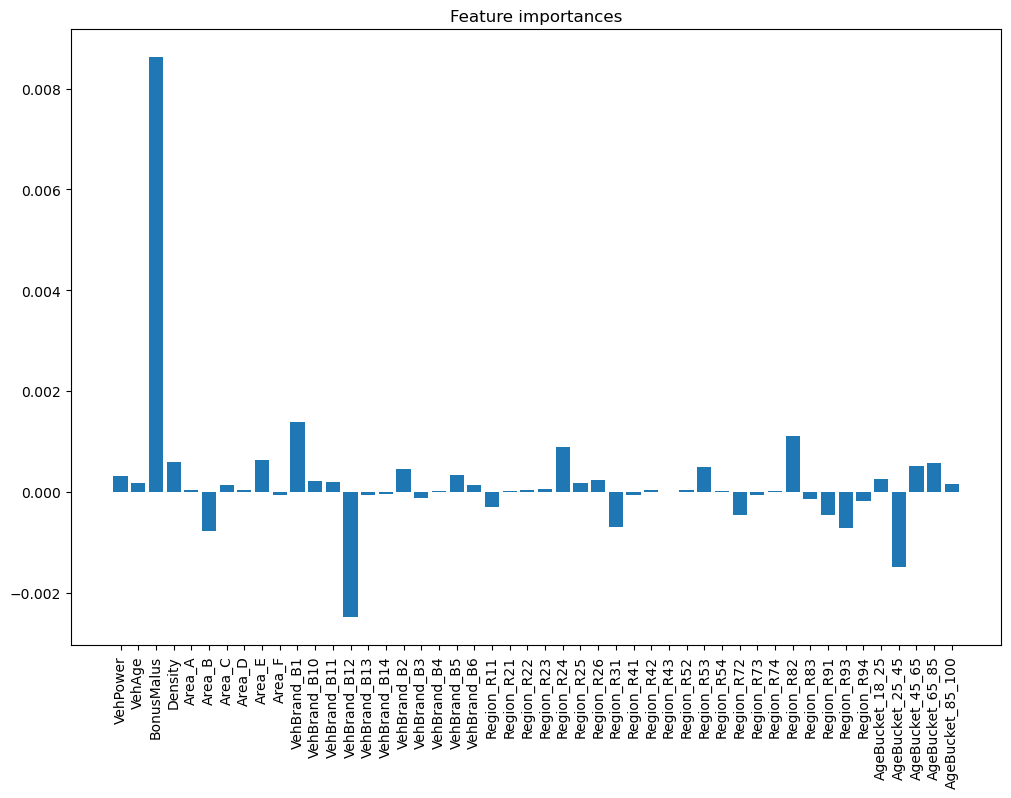

In [69]:
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(X.columns, avg_betas[0], align="center")
plt.xticks(X.columns, rotation=90)
plt.show()

In [70]:
weight = y_train.value_counts(normalize=True)[0] / y_train.value_counts(normalize=True)[1]

In [71]:
model = LogisticRegression(class_weight='balanced')

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2'] #'l1', 'elasticnet'
space['C'] = loguniform(1e-5, 100)

cv = StratifiedKFold(n_splits=5)

RCV = RandomizedSearchCV(estimator=model, param_distributions=space, n_iter=50, scoring='recall', n_jobs=-1, cv=cv, random_state=42)

LR = RCV.fit(X_train, y_train).best_estimator_

y_pred = LR.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11209  7995]
 [  329   467]]
              precision    recall  f1-score   support

           0       0.97      0.58      0.73     19204
           1       0.06      0.59      0.10       796

    accuracy                           0.58     20000
   macro avg       0.51      0.59      0.42     20000
weighted avg       0.94      0.58      0.70     20000



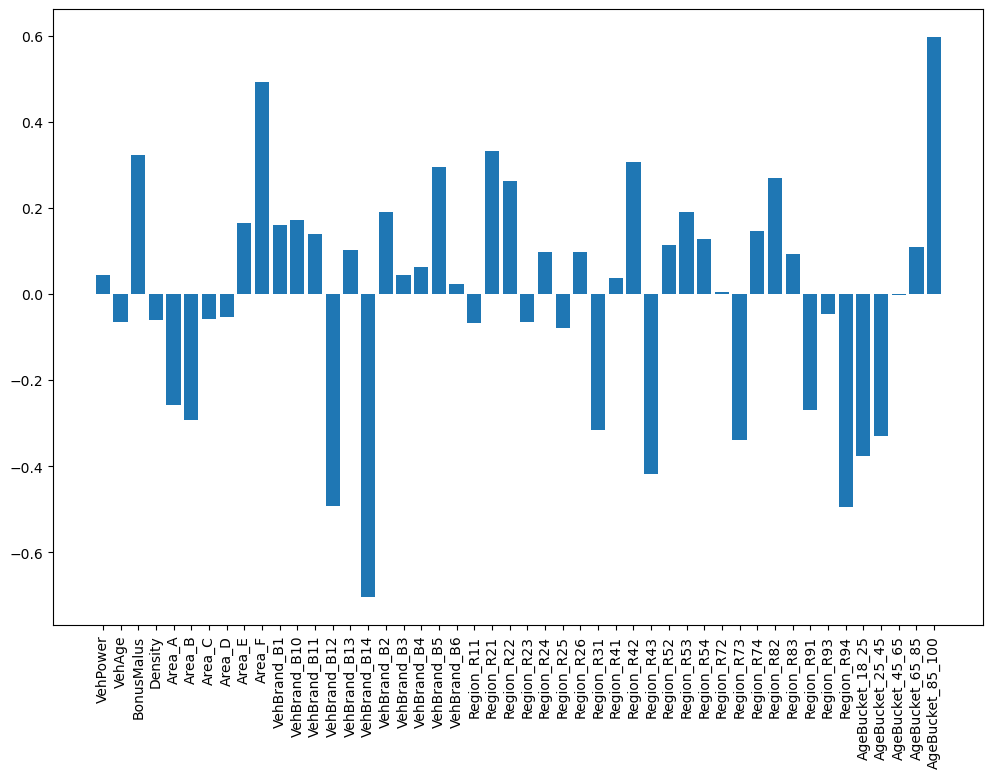

In [72]:
betas = LR.coef_

plt.figure(figsize=(12, 8))
plt.bar(X.columns, betas[0])
plt.xticks(rotation=90)
plt.show()

In [73]:
models_RF = []
for x, y in zip(Xs, Ys):
    model = RandomForestClassifier(n_estimators=100, oob_score=recall_score)
    model.fit(x, y)
    models_RF.append(model)

predictions_RF = [model.predict(X_test) for model in models_RF]
probas_RF = [model.predict_proba(X_test) for model in models_RF]
importances_RF = np.mean([model.feature_importances_ for model in models_RF], axis=0)
std_RF = np.mean([np.std([tree.feature_importances_ for tree in model.estimators_], axis=0) for model in models_RF], axis=0)
average_preds_RF = np.mean(predictions_RF, axis=0) > 0.5
average_probas_RF = np.mean(predictions_RF, axis=0)

confusion_matrix(y_test, average_preds_RF)

array([[10935,  8269],
       [  342,   454]], dtype=int64)

In [74]:
print(classification_report(y_test, average_preds_RF))

              precision    recall  f1-score   support

           0       0.97      0.57      0.72     19204
           1       0.05      0.57      0.10       796

    accuracy                           0.57     20000
   macro avg       0.51      0.57      0.41     20000
weighted avg       0.93      0.57      0.69     20000



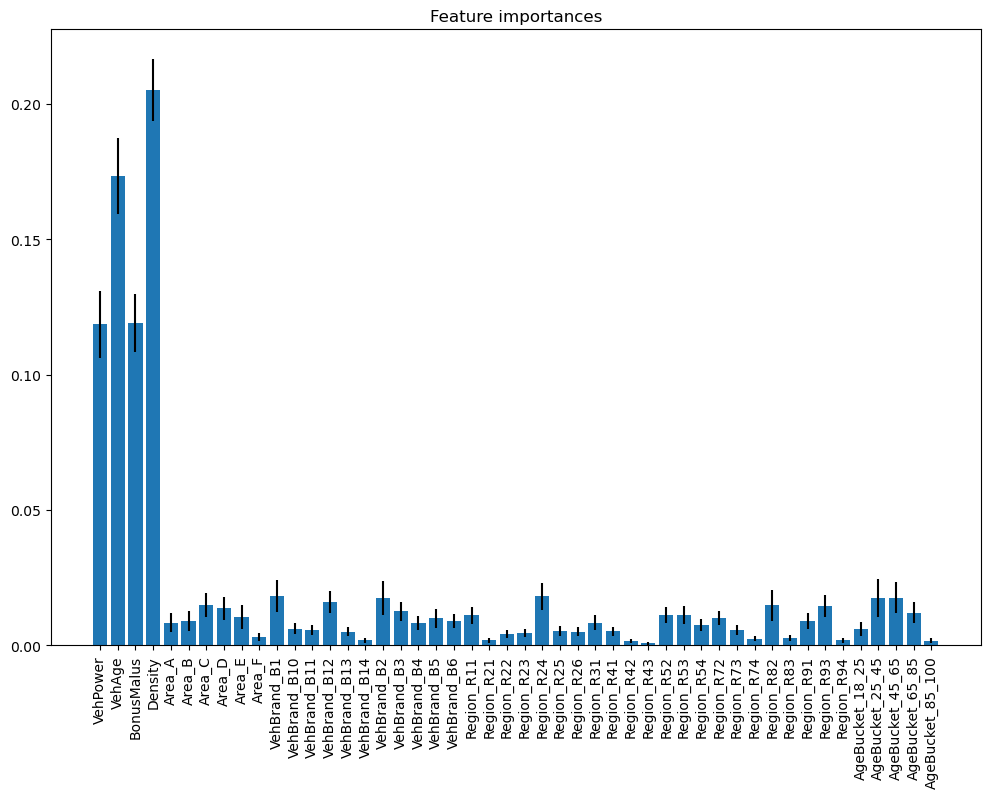

In [75]:
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(X.columns, importances_RF, yerr=std_RF)
plt.xticks(rotation=90)
plt.show()

In [76]:
data.groupby('AgeBucket').size()

C:\Users\louis\AppData\Local\Temp\ipykernel_2088\1931611759.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('AgeBucket').size()


AgeBucket
[18, 25)      4467
[25, 45)     45997
[45, 65)     38751
[65, 85)     10482
[85, 100)      303
dtype: int64

In [77]:
good_probas = average_probas_RF[average_preds_RF == y_test]
bad_probas = average_probas_RF[average_preds_RF != y_test]

good_pos_probas = good_probas[average_preds_RF[average_preds_RF == y_test] == 1]
good_neg_probas = good_probas[average_preds_RF[average_preds_RF == y_test] == 0]

bad_pos_probas = bad_probas[average_preds_RF[average_preds_RF != y_test] == 1]
bad_neg_probas = bad_probas[average_preds_RF[average_preds_RF != y_test] == 0]

In [78]:
RF_model = RandomForestClassifier(criterion='entropy')

In [79]:
cv = StratifiedKFold(n_splits=5)

RCV = GridSearchCV(RF_model, params, scoring='recall', n_jobs=-1, cv=cv)

RF = RCV.fit(X_train, y_train).best_estimator_

y_pred = RF.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[19204     0]
 [  796     0]]


In [80]:
models_RF = []
scores_RF = []
for x, y in zip(Xs, Ys):
    model = GridSearchCV(RF_model, params, scoring='recall', n_jobs=-1, cv=5)
    model = model.fit(x, y).best_estimator_
    models_RF.append(model)
    scores_RF.append(model.score(x, y))

predictions_RF = [model.predict(X_test) for model in models_RF]
predictions_RF_best = models_RF[np.argmin(scores_RF)].predict(X_test)
average_preds_RF = np.mean(predictions_RF, axis=0)
importances_RF = np.mean([model.feature_importances_ for model in models_RF], axis=0)
preds_RF = average_preds_RF > 0.5

confusion_matrix(y_test, preds_RF), confusion_matrix(y_test, predictions_RF_best)

(array([[11356,  7848],
        [  326,   470]], dtype=int64),
 array([[10113,  9091],
        [  288,   508]], dtype=int64))

In [81]:
print(classification_report(y_test, preds_RF))

              precision    recall  f1-score   support

           0       0.97      0.59      0.74     19204
           1       0.06      0.59      0.10       796

    accuracy                           0.59     20000
   macro avg       0.51      0.59      0.42     20000
weighted avg       0.94      0.59      0.71     20000



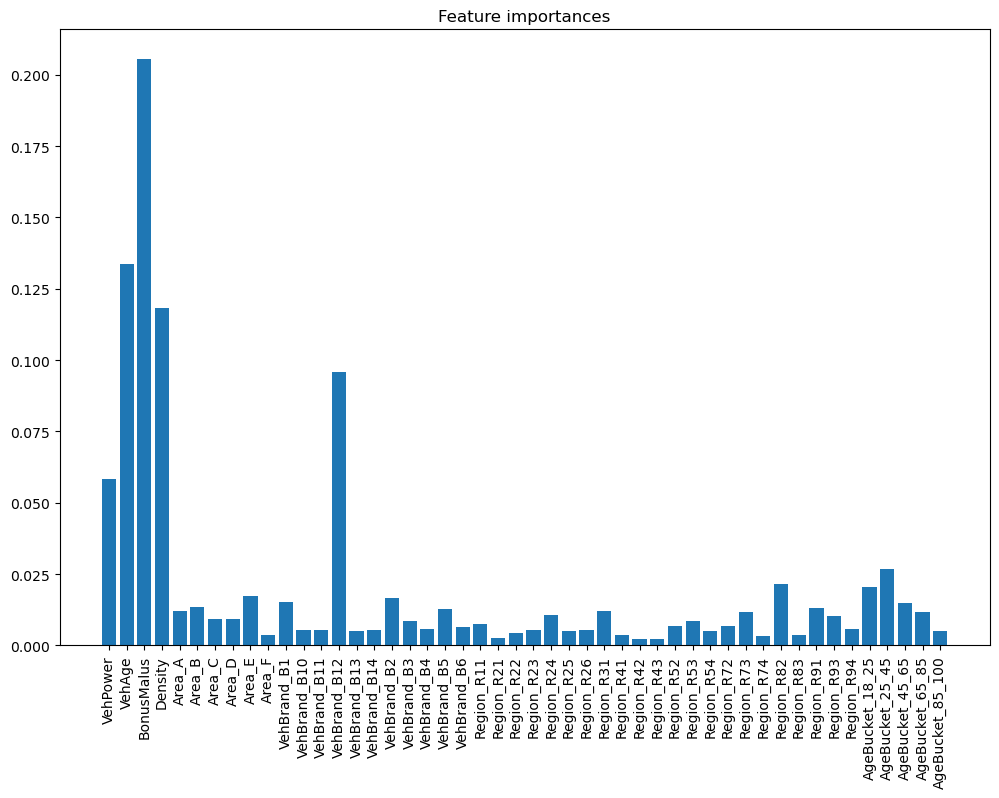

In [82]:
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(X.columns, importances_RF)
plt.xticks(rotation=90)
plt.show()

In [83]:
predictions_RF_log = pd.concat([pd.DataFrame(predictions), pd.DataFrame(predictions_RF)], axis=0).mean(axis=0) > 0.5

confusion_matrix(y_test, predictions_RF_log)

array([[12149,  7055],
       [  369,   427]], dtype=int64)

In [84]:
print(classification_report(y_test, predictions_RF_log))

              precision    recall  f1-score   support

           0       0.97      0.63      0.77     19204
           1       0.06      0.54      0.10       796

    accuracy                           0.63     20000
   macro avg       0.51      0.58      0.43     20000
weighted avg       0.93      0.63      0.74     20000



In [85]:
models_kmean = []
for x, y in zip(Xs, Ys):
    model = KMeans(n_clusters=2, n_init=100)
    model.fit(x, y)
    models_kmean.append(model)

predictions_kmean = [model.predict(X_test) for model in models_kmean]
average_preds_kmean = np.mean(predictions_kmean, axis=0) > 0.5

confusion_matrix(y_test, average_preds_kmean)

array([[15433,  3771],
       [  566,   230]], dtype=int64)

In [86]:
print(classification_report(y_test, average_preds_kmean))

              precision    recall  f1-score   support

           0       0.96      0.80      0.88     19204
           1       0.06      0.29      0.10       796

    accuracy                           0.78     20000
   macro avg       0.51      0.55      0.49     20000
weighted avg       0.93      0.78      0.85     20000



In [87]:
from xgboost import XGBClassifier

In [88]:
XGB_model = XGBClassifier()

params = {
    'learning_rate': [0.01, 0.05, 0.10, 0.20],
    'max_depth': [3, 5, 8, 10, 15],
    #'min_child_weight': [1, 3, 5, 7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    #'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
}

cv = StratifiedKFold(n_splits=5)
RCV = GridSearchCV(XGB_model, params, scoring='recall', n_jobs=-1, cv=cv)

# XGB = XGB_model.fit(X_train, y_train)
# XGB_RCV = RCV.fit(X_train, y_train).best_estimator_

# y_pred_XGB = XGB.predict(X_test)
# y_pred_XGB_RCV = XGB_RCV.predict(X_test)

# print(confusion_matrix(y_test, y_pred_XGB))
# print(confusion_matrix(y_test, y_pred_XGB_RCV))

In [89]:
#print(classification_report(y_test, y_pred_XGB))

In [90]:
#print(classification_report(y_test, y_pred_XGB_RCV))

In [91]:
# models_XGB = []
# for x, y in zip(Xs, Ys):
#     model = XGBClassifier()
#     model.fit(x, y)
#     models_XGB.append(model)

# predictions_XGB = [model.predict(X_test) for model in models_XGB]
# average_preds_XGB = np.mean(predictions_XGB, axis=0) > 0.5

# confusion_matrix(y_test, average_preds_XGB)

In [92]:
#print(classification_report(y_test, average_preds_XGB))

In [93]:
# XGB_model = XGBClassifier()
# models_XGB = []
# scores = []
# for x, y in zip(Xs, Ys):
#     model = GridSearchCV(XGB_model, params, n_jobs=-1, scoring='roc_auc', cv=5)
#     model.fit(x, y).best_estimator_
#     models_XGB.append(model)
#     scores.append(model.score(x, y))

# predictions_XGB = [model.predict(X_test) for model in models_XGB]
# predictions_XGB_best = models_XGB[np.argmin(scores)].predict(X_test)
# average_preds_XGB = np.mean(predictions_XGB, axis=0) > 0.5

# confusion_matrix(y_test, average_preds_XGB)

In [94]:
#confusion_matrix(y_test, predictions_XGB_best)

In [95]:
#print(classification_report(y_test, average_preds_XGB))